# Case Study : **IDENTIFYING THE RIGHT CAB COMPANY FOR INVESTMENT**

**Problem Statement:**
XYZ (US-based private firm) is considering an investment in the growing US cab industry. With multiple key players present, XYZ seeks data-driven insights to identify the company with the strongest potential for return on investment (ROI).

**Objective:**
Analyze provided datasets on two cab companies to understand their customer demographics, pricing strategies, profitability, and overall market performance. Leverage these insights to recommend the most promising company for XYZ's investment, considering their G2M strategy.

**Project Workflow:**
1.	Data Collection and Understanding
2.	Exploratory Data Analysis (EDA)
3.	Feature Engineering and Data Transformation
4.  Insights Generation
5.	Hypothesis Testing
6.	Conclusion




In [409]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import string
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
import statsmodels.api as sm
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [410]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [411]:
#!ls '/content/drive/My Drive/'

In [412]:
df_cab= pd.read_csv('/content/drive/My Drive/Dataset/G2M Cab_DataSets/Cab_Data.csv')
df_city= pd.read_csv('/content/drive/My Drive/Dataset/G2M Cab_DataSets/City.csv')
df_customer= pd.read_csv('/content/drive/My Drive/Dataset/G2M Cab_DataSets/Customer_ID.csv')
df_transaction= pd.read_csv('/content/drive/My Drive/Dataset/G2M Cab_DataSets/Transaction_ID.csv')
df_holidays=pd.read_csv('/content/drive/My Drive/Dataset/G2M Cab_DataSets/US_Holiday_Dates.csv')

# **Undrestanding the data**

**Cab Data:** this file includes details of transaction for 2 cab companies 'Pink Cab' and 'Yellow Cab'

``Transaction ID:`` A unique identifier assigned to each transaction
``Date of Travel:`` The date on which the cab service was availed by the customer

``Company:`` Indicates the cab company associated with the transaction

``City:`` Specifies the city in which the cab service was utilized

``KM Travelled:`` Represents the distance covered during the cab ride

``Price Charged:`` Denotes the amount charged to the customer for availing the cab service

``Cost of Trip:`` Indicates the operational cost incurred by the cab companies for facilitating the trip

In [413]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [414]:
print(df_cab.shape)
df_cab.sample(3)

(359392, 7)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
162319,10200331,42939,Yellow Cab,CHICAGO IL,43.29,850.86,612.9864
342087,10418757,43435,Yellow Cab,NEW YORK NY,20.00,470.32,256.8000
325894,10399631,43406,Pink Cab,DALLAS TX,17.00,205.53,200.6000


# City Data

``City:`` Refers to the name of the city where the cab service is provided.

``Population:`` Indicates the total population of the city where the cab service operates.

``Users:`` Represents the number of users or customers availing cab services in the respective city.

In [415]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [416]:
print(df_city.shape)
df_city.sample(3)

(20, 3)


,City,Population,Users
5,ORANGE COUNTY,"1,030,185","12,994"
9,ATLANTA GA,"814,885","24,701"
8,DALLAS TX,"942,908","22,157"


# Customer Data

``Customer ID:`` This is a unique identifier assigned to each customer using the cab service.

``Gender:`` Indicates the gender of the customer availing the cab service.

``Age:`` Represents the age of the customer availing the cab service.

``Income (USD/Month):`` Indicates the monthly income of the customer in USD.

In [417]:
print(df_customer.shape)
df_customer.info()

(49171, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [418]:
df_customer.sample(3)

,Customer ID,Gender,Age,Income (USD/Month)
27341,31770,Female,26,24139
30716,29359,Female,36,20878
18798,29955,Male,31,16962


# Transaction data

``Transaction ID:`` This is a unique identifier assigned to each transaction.

``Customer ID:`` This is a unique identifier assigned to each customer using the cab service. It helps in associating transactions with specific customers and understanding their usage patterns.

``Payment_Mode:`` Indicates the mode of payment used for the transaction, such as cash or credit/debit card.

In [419]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [420]:
print(df_transaction.shape)
df_transaction.sample(3)

(440098, 3)


,Transaction ID,Customer ID,Payment_Mode
295089,10295100,59144,Card
432198,10432209,18509,Card
122421,10122432,2803,Card


In [421]:
df_transaction.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,440098.0,1.022006e+07,127045.493722,10000011.0,10110035.25,10220059.5,10330083.75,10440108.0
Customer ID,440098.0,2.361951e+04,21195.549816,1.0,3530.00,15168.0,43884.00,60000.0


# Holiday Data

The holiday data file contains information about holidays observed, including the date, holiday name, day of the week, month, and year.

``Date:`` This field represents the date of the holiday

``Holiday:`` This field contains the name or description of the holiday being observed.

``WeekDay:`` This field indicates the day of the week on which the holiday falls.

``Month:`` This field represents the month in which the holiday occurred

``Day:`` This field represents the day of the month on which the holiday occurred.

``Year:`` This field represents the year in which the holiday occurred.

In [422]:
df_holidays.dtypes

Date       object
Holiday    object
WeekDay    object
Month       int64
Day         int64
Year        int64
dtype: object

In [423]:
df_holidays.head(3)

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006


**Filtering Holiday data**

We need to filter holiday between 01/2016 to 12/2018 as the main dataset Cab data period ranges from 01/2016 to 12/2018 as the main dataset Cab data period ranges from

In [424]:
df_holidays['Date'] = pd.to_datetime(df_holidays['Date'])
holidays_filtered_df = df_holidays[(df_holidays['Date'] >= '2016-01-01') & (df_holidays['Date'] <= '2018-12-31')]
holidays_filtered_df.sample(3)

,Date,Holiday,WeekDay,Month,Day,Year
166,2017-01-16,"Martin Luther King, Jr. Day",Monday,1,16,2017
50,2018-12-24,Christmas Eve,Monday,12,24,2018
163,2018-01-15,"Martin Luther King, Jr. Day",Monday,1,15,2018


**Null Values**

In [425]:
print(f" Null values in Cab data: {df_cab.isnull().sum().sum()}")
print(f" \n Null values in City data: {df_city.isnull().sum().sum()}")
print(f" \n Null values in Customer data: {df_customer.isnull().sum().sum()}")
print(f" \n Null values in Transaction data: {df_transaction.isnull().sum().sum()}")

 Null values in Cab data: 0
 
 Null values in City data: 0
 
 Null values in Customer data: 0
 
 Null values in Transaction data: 0


**Missing Values**

In [426]:
df_cab.describe(include='all')

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392,359392,359392.000000,359392.000000,359392.000000
unique,NaN,NaN,2,19,NaN,NaN,NaN
top,NaN,NaN,Yellow Cab,NEW YORK NY,NaN,NaN,NaN
freq,NaN,NaN,274681,99885,NaN,NaN,NaN
mean,1.022076e+07,42964.067998,NaN,NaN,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,NaN,NaN,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,NaN,NaN,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,NaN,NaN,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,NaN,NaN,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,NaN,NaN,32.960000,583.660000,413.683200


In [427]:
print(f" Missing values in Cab data: {df_cab.isna().any().any()}")
print(f" \n Missing values in City data: {df_city.isna().any().any()}")
print(f" \n Missing values in Customer data: {df_customer.isna().any().any()}")
print(f" \n Missing values in Transaction data: {df_transaction.isna().any().any()}")

 Missing values in Cab data: False
 
 Missing values in City data: False
 
 Missing values in Customer data: False
 
 Missing values in Transaction data: False


**Duplicate records**

In [428]:
print(f" Duplicate records in Cab data: {df_cab.duplicated().sum()}")
print(f" \n Duplicate recordss in City data: {df_city.duplicated().sum()}")
print(f" \n Duplicate records in Customer data: {df_customer.duplicated().sum()}")
print(f" \n Duplicate records in Transaction data: {df_transaction.duplicated().sum()}")

 Duplicate records in Cab data: 0
 
 Duplicate recordss in City data: 0
 
 Duplicate records in Customer data: 0
 
 Duplicate records in Transaction data: 0


# **Data Preprocessing**


1.   Rename columns in datframe
2.   Feature Engineering : Creating  new features
3.   Remove punctuations in record values



**Rename columns in all dataframes**

In [429]:
dataframes=[df_cab,df_customer,df_transaction]
for df in dataframes:
  for col in df.columns:
    if ' ' in col:
      df.rename(columns={col: col.replace(' ', '_')}, inplace=True)

**Data Transformation**

**``Note``** that the **``Date_of_Travel``** column contains date  in Excel numberical format. We know that the given dataset period ranges from 31/01/2016 to 31/12/2018. Hence we conver the serial number into date format and store it in a new colum called **``Trave_Date``**

In [430]:
df_cab.tail()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
359391,10440107,43102,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192


In [431]:
# Serial number to date format
import xlrd
def serial_to_date(serial_number):
  datetime_date = xlrd.xldate_as_datetime(serial_number, 0)
  return datetime_date.date()

In [432]:
df_cab["Travel_Date"] = df_cab["Date_of_Travel"].apply(serial_to_date)
df_cab["Travel_Date"] = df_cab["Travel_Date"].astype('datetime64[ms]')

**Feature Engineering**

Extract year, month, day using datetime methods

In [433]:
df_cab['Year'] = df_cab['Travel_Date'].dt.year
df_cab['Month'] = df_cab['Travel_Date'].dt.month
df_cab['Day'] = df_cab['Travel_Date'].dt.day
df_cab['Day_of_week'] = df_cab['Travel_Date'].dt.dayofweek
df_cab['Day_of_week_name'] = df_cab['Travel_Date'].dt.day_name()
df_cab['Weekend'] = df_cab['Day_of_week'].isin([5, 6]).astype(int)

In [434]:
df_cab.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Travel_Date,Year,Month,Day,Day_of_week,Day_of_week_name,Weekend
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-08,2016,1,8,4,Friday,0
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-06,2016,1,6,2,Wednesday,0
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-02,2016,1,2,5,Saturday,1
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-07,2016,1,7,3,Thursday,0
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-03,2016,1,3,6,Sunday,1


Change the column name in easy format like **Income_(USD/Month)** to **"Income"**

In [435]:
df_customer.rename(columns={"Income_(USD/Month)": "Income"}, inplace=True)
df_customer.sample(3)

,Customer_ID,Gender,Age,Income
2921,27260,Male,26,8102
6806,5733,Male,62,3711
12666,51855,Male,33,10314


**Remove punctuations in records**

In [436]:
df_city.head(2)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"


In [437]:
def preprocess_text(text):
    # Remove punctuation:
    no_punctuation = ''.join([char for char in text if char not in string.punctuation])

    # Convert to integer
    try:
        result = int(no_punctuation)
    except ValueError:
        # Handle cases where the text cannot be converted to an integer
        result = None

    return result

In [438]:
df_city['Population']=df_city['Population'].apply(preprocess_text)
df_city['Users']=df_city['Users'].apply(preprocess_text)

# **Exploratory Data Analysis**

# Merge the data

Create a master data by merging Cab data, Transaytion data , Customer data and City data

# **Relationships across Files**
**Cab_Data.csv** links to Transaction_ID.csv via a transaction ID.

**Transaction_ID.csv** links to Customer_ID.csv via a customer ID.

**Customer_ID.csv** links to City.csv via a City field

In [439]:
df_transaction.shape
print(f" Count of duplicate Transaction ID records in Cab data: {df_cab.duplicated().sum()}")

 Count of duplicate Transaction ID records in Cab data: 0


In [440]:
# Transaction_ID is the unique identifier
merged_df = pd.merge(left=df_cab, right=df_transaction, on='Transaction_ID', how='inner')

#merge with Customer_ID based on Customer_ID in transaction_id
merged_df = pd.merge(left=merged_df, right=df_customer, on='Customer_ID', how='inner')

# merge with City based on City in Cab_Data
merged_df = pd.merge(left=merged_df, right=df_city, left_on='City', right_on='City', how='inner')

# merge with Holiday data on Month and Day
merged_df = pd.merge(left=merged_df, right= holidays_filtered_df[['Month', 'Day', 'Holiday']],
                    how='left', on=['Month', 'Day'])
merged_df.head(3)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Travel_Date,Year,Month,...,Day_of_week_name,Weekend,Customer_ID,Payment_Mode,Gender,Age,Income,Population,Users,Holiday
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-08,2016,1,...,Friday,0,29290,Card,Male,28,10813,814885,24701,NaN
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-21,2018,7,...,Saturday,1,29290,Cash,Male,28,10813,814885,24701,NaN
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-23,2018,11,...,Friday,0,29290,Card,Male,28,10813,814885,24701,Thanksgiving Day


**``Note:-``** There are null values in **``Holiday``** Column that didnt have a match. So lets create a new column as **``Holiday_Indicator``** to identifiy whether the given day is a holiday or not.

In [441]:
merged_df['Holiday_Indicator'] = merged_df['Holiday'].notnull().astype(int)
merged_df.head(3)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Travel_Date,Year,Month,...,Weekend,Customer_ID,Payment_Mode,Gender,Age,Income,Population,Users,Holiday,Holiday_Indicator
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-08,2016,1,...,0,29290,Card,Male,28,10813,814885,24701,NaN,0
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-21,2018,7,...,1,29290,Cash,Male,28,10813,814885,24701,NaN,0
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-23,2018,11,...,0,29290,Card,Male,28,10813,814885,24701,Thanksgiving Day,1


In [442]:
merged_df['Profit'] = merged_df['Price_Charged']-merged_df['Cost_of_Trip']
merged_df['Profit_Percentage'] = (merged_df['Profit'] / merged_df['Price_Charged']) * 100
merged_df=merged_df.round(2)
merged_df.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Travel_Date,Year,Month,...,Payment_Mode,Gender,Age,Income,Population,Users,Holiday,Holiday_Indicator,Profit,Profit_Percentage
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.64,2016-01-08,2016,1,...,Card,Male,28,10813,814885,24701,NaN,0,57.32,15.45
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.42,2018-07-21,2018,7,...,Cash,Male,28,10813,814885,24701,NaN,0,281.28,46.98
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.40,2018-11-23,2018,11,...,Card,Male,28,10813,814885,24701,Thanksgiving Day,1,194.65,24.58
3,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.40,2018-11-23,2018,11,...,Card,Male,28,10813,814885,24701,Thanksgiving Eve,1,194.65,24.58
4,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.85,2016-01-06,2016,1,...,Card,Male,27,9237,814885,24701,NaN,0,23.67,6.60


In [443]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386799 entries, 0 to 386798
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Transaction_ID     386799 non-null  int64         
 1   Date_of_Travel     386799 non-null  int64         
 2   Company            386799 non-null  object        
 3   City               386799 non-null  object        
 4   KM_Travelled       386799 non-null  float64       
 5   Price_Charged      386799 non-null  float64       
 6   Cost_of_Trip       386799 non-null  float64       
 7   Travel_Date        386799 non-null  datetime64[ms]
 8   Year               386799 non-null  int32         
 9   Month              386799 non-null  int32         
 10  Day                386799 non-null  int32         
 11  Day_of_week        386799 non-null  int32         
 12  Day_of_week_name   386799 non-null  object        
 13  Weekend            386799 non-null  int64   

In [444]:
data=merged_df.copy()

**Drop the not required columns**

Example: **``Date_of_Travel``** is in series format and we have new column **``Travel_Date``** with date format. So we can drop the Date_of_Travel column

In [445]:
data = data.drop(['Date_of_Travel'], axis=1)

In [446]:
print(f" Null values in Merged data: {data.isnull().sum().sum()}")

 Null values in Merged data: 325625


**``Note:-``** As we have seen earlier Null values are because of Holiday data. So lets handle Null Values.

In [447]:
data['Holiday'].fillna(0, inplace=True)
print(f" Null values in Merged data: {data.isnull().sum().sum()}")

 Null values in Merged data: 0


**Handle Duplicate data after merging the data**

In [448]:
print(f" Duplicate records in Merged data: {data.duplicated().sum()}")

 Duplicate records in Merged data: 20969


In [449]:
#Fetch all duplicate values
duplicate=data[data.duplicated(keep='last')]
duplicate.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Travel_Date,Year,Month,Day,...,Payment_Mode,Gender,Age,Income,Population,Users,Holiday,Holiday_Indicator,Profit,Profit_Percentage
28,10254432,Yellow Cab,ATLANTA GA,36.10,536.66,459.19,2017-11-11,2017,11,11,...,Cash,Male,23,8542,814885,24701,Veterans Day,1,77.47,14.44
29,10254432,Yellow Cab,ATLANTA GA,36.10,536.66,459.19,2017-11-11,2017,11,11,...,Cash,Male,23,8542,814885,24701,Veterans Day,1,77.47,14.44
196,10285397,Yellow Cab,ATLANTA GA,3.96,53.98,52.75,2017-12-31,2017,12,31,...,Card,Male,21,24678,814885,24701,New Year’s Eve,1,1.23,2.28
197,10285397,Yellow Cab,ATLANTA GA,3.96,53.98,52.75,2017-12-31,2017,12,31,...,Card,Male,21,24678,814885,24701,New Year’s Eve,1,1.23,2.28
203,10289090,Yellow Cab,ATLANTA GA,3.84,78.25,46.08,2017-12-31,2017,12,31,...,Cash,Male,33,11550,814885,24701,New Year’s Eve,1,32.17,41.11


In [450]:
#Remove Duplicate Records
data.drop_duplicates(inplace=True)
data.duplicated().sum()
print(f" Duplicate records in Merged data: {data.duplicated().sum()}")

 Duplicate records in Merged data: 0


In [451]:
print(f" Missing values in Merged data: {data.isna().any().any()}")

 Missing values in Merged data: False


# **Numerical Features**

In [452]:
numerical_variables = [feature for feature in data.columns if merged_df[feature].dtypes!='O']
print('Number of numberical variables:', len(numerical_variables))

data[numerical_variables].sample(1)

Number of numberical variables: 18


,Transaction_ID,KM_Travelled,Price_Charged,Cost_of_Trip,Travel_Date,Year,Month,Day,Day_of_week,Weekend,Customer_ID,Age,Income,Population,Users,Holiday_Indicator,Profit,Profit_Percentage
226329,10011823,3.39,107.14,40.68,2016-02-24,2016,2,24,2,0,2469,37,3363,8405837,302149,0,66.46,62.03


# **Categorial Features**

In [453]:
categorial_variables = [feature for feature in data.columns if merged_df[feature].dtypes=='O']
print('Number of categorial variables:', len(categorial_variables))

data[categorial_variables].sample(1)

Number of categorial variables: 6


,Company,City,Day_of_week_name,Payment_Mode,Gender,Holiday
256369,Yellow Cab,NEW YORK NY,Friday,Cash,Female,0


# **Univariate Analysis**

**1. Numerical  variables**

Transaction_ID
Skew : 0.0


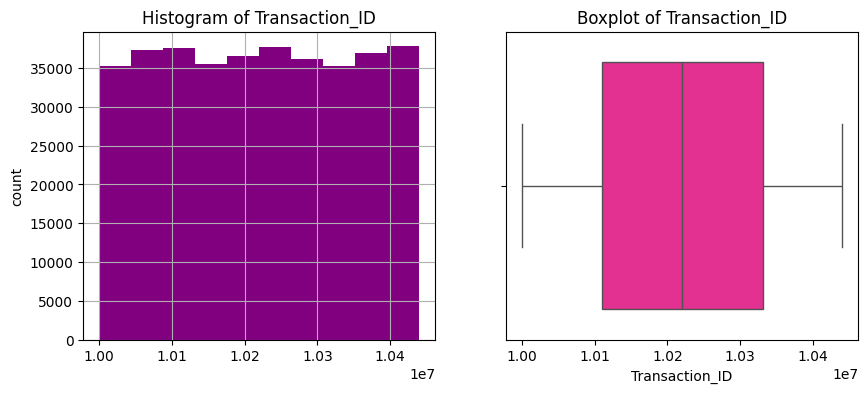

KM_Travelled
Skew : 0.06


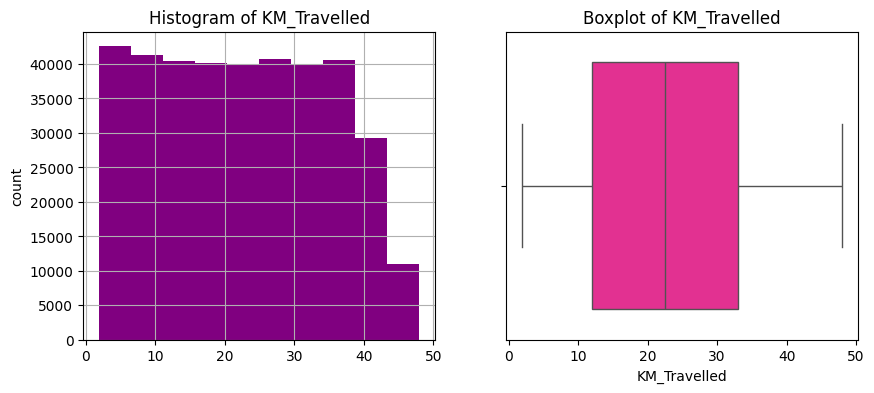

Price_Charged
Skew : 0.87


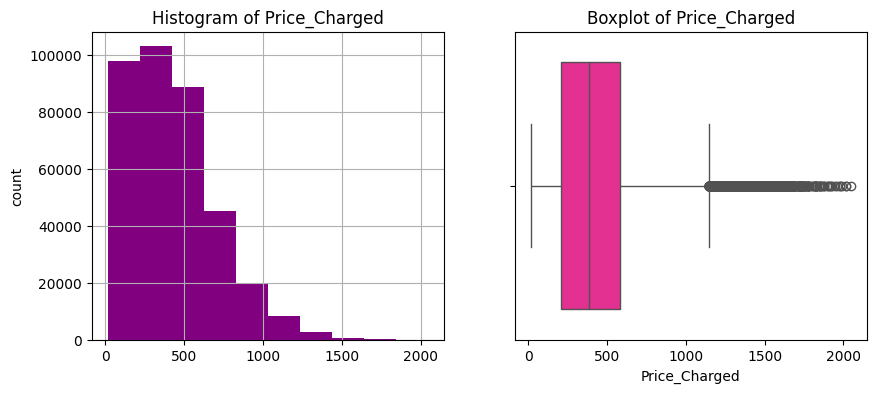

Cost_of_Trip
Skew : 0.14


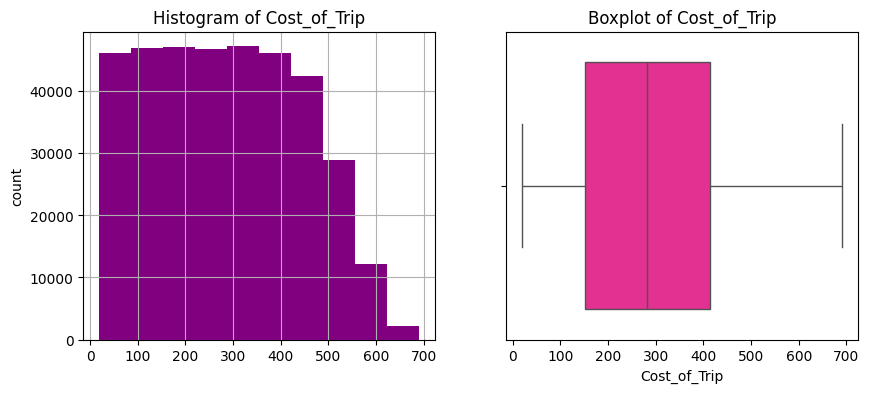

Year
Skew : -0.08


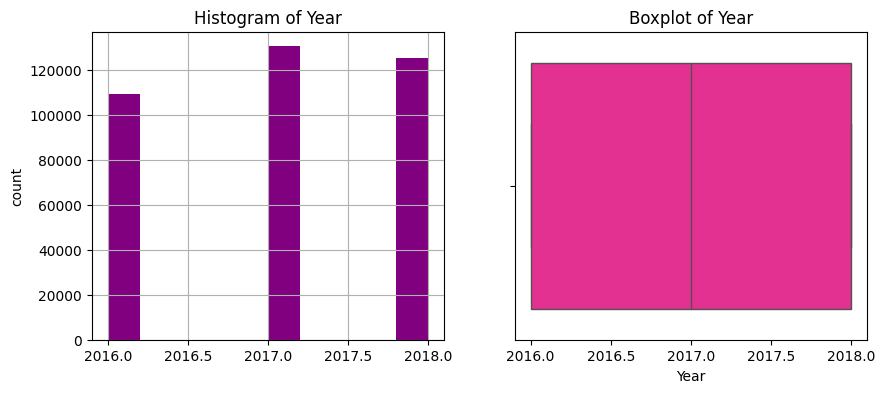

Month
Skew : -0.41


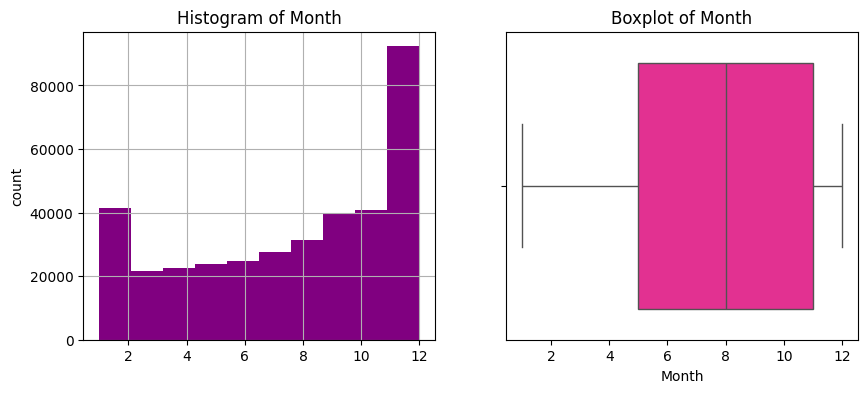

Day
Skew : 0.02


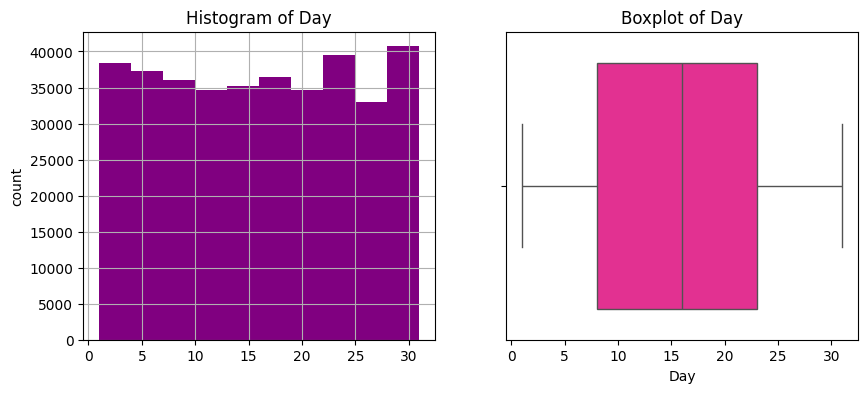

Day_of_week
Skew : -0.61


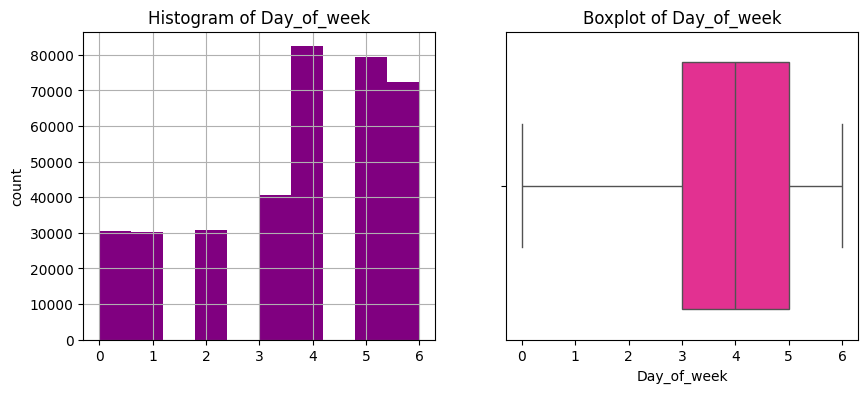

Weekend
Skew : 0.35


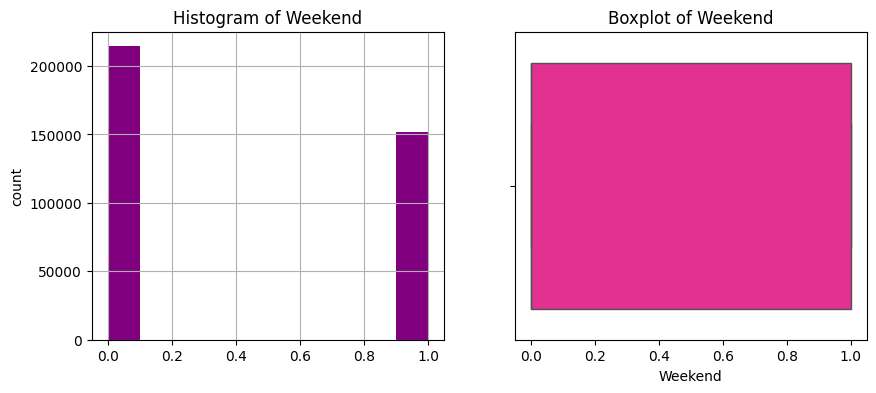

Customer_ID
Skew : 0.88


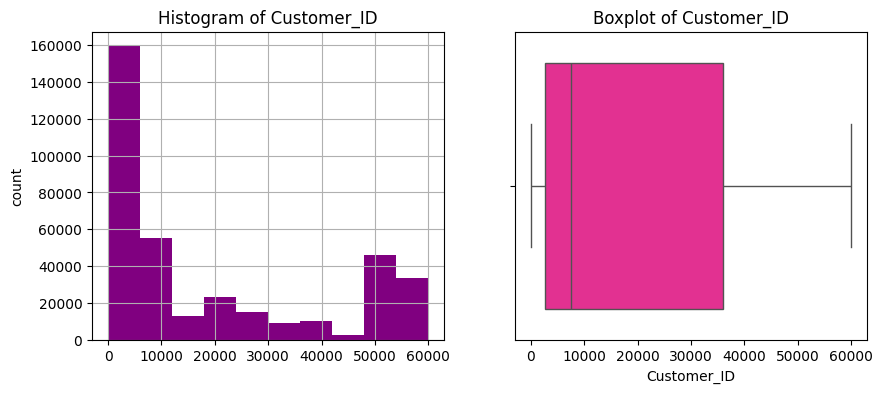

Age
Skew : 0.69


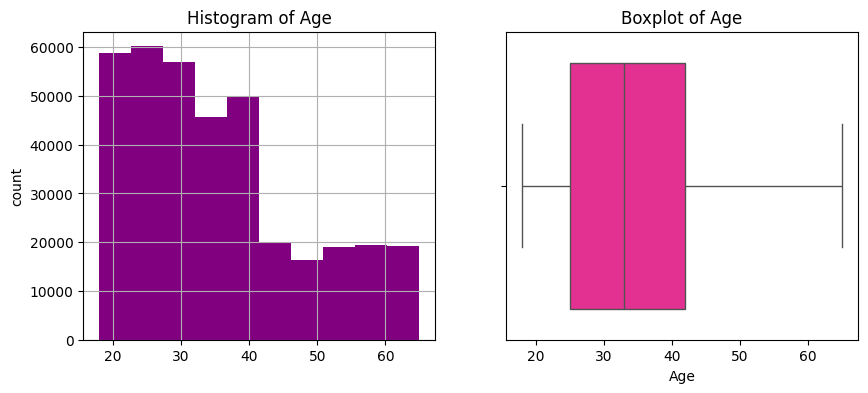

Income
Skew : 0.31


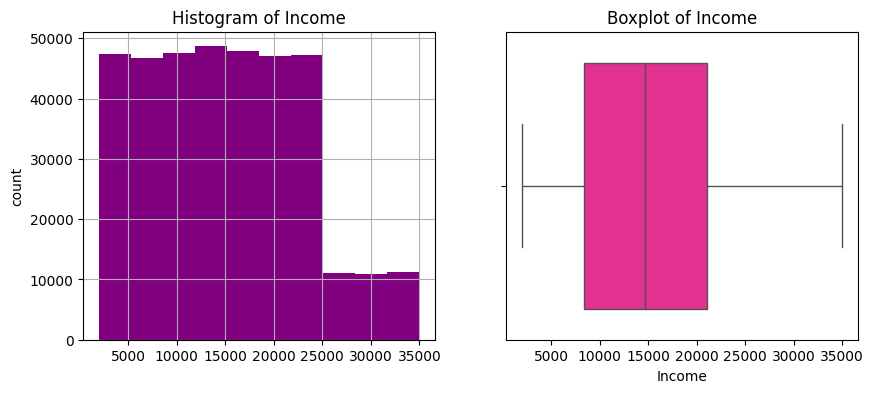

Population
Skew : 0.9


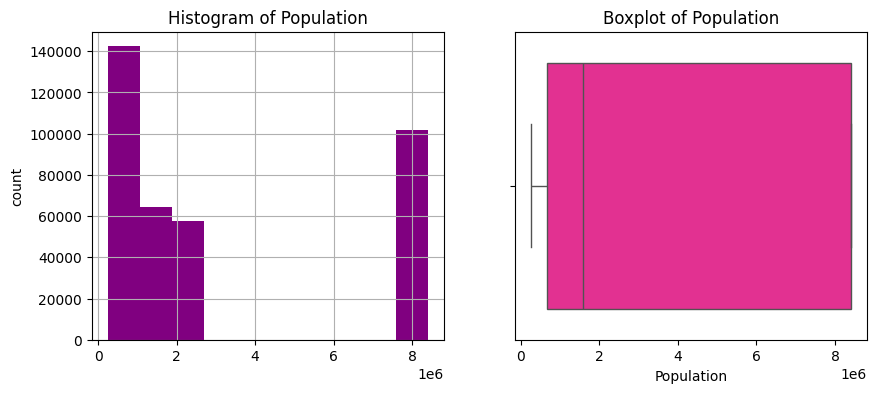

Users
Skew : 0.27


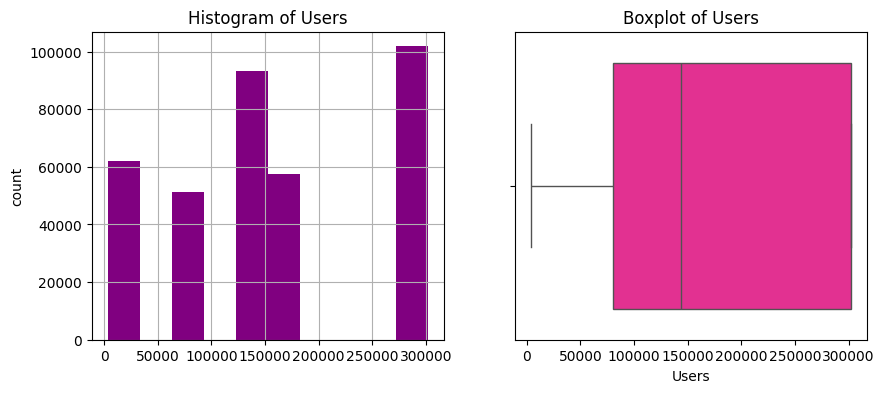

Holiday_Indicator
Skew : 2.49


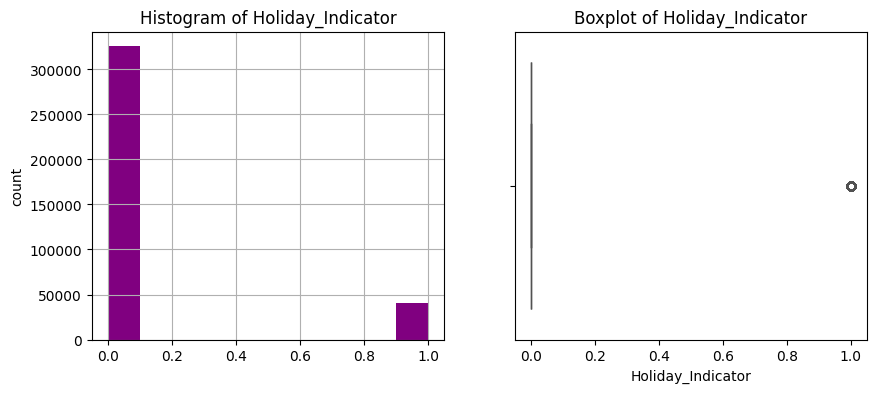

Profit
Skew : 1.9


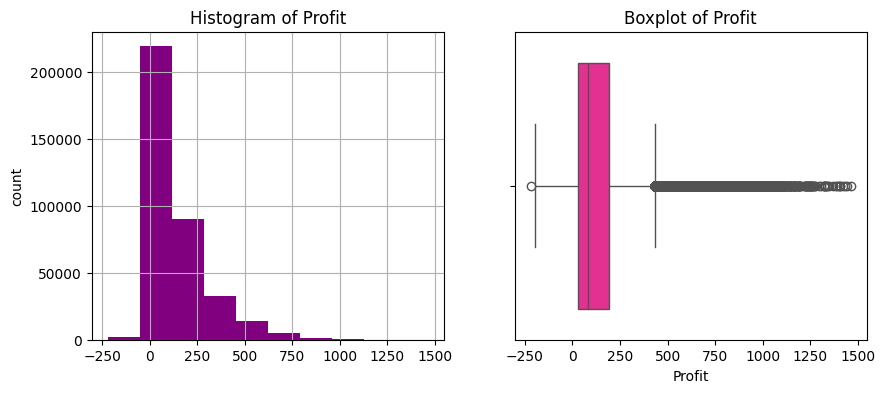

Profit_Percentage
Skew : -0.1


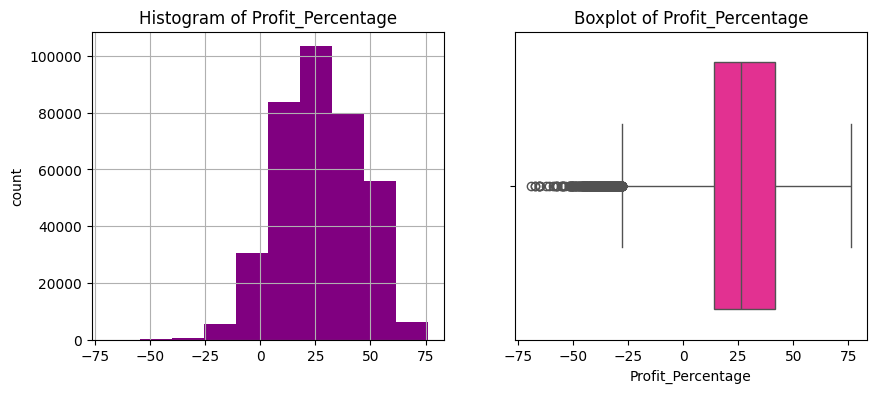

In [454]:
for col in numerical_variables:
  if col!='Travel_Date':
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (10, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=True,color='purple')
    plt.ylabel('count')
    plt.title('Histogram of ' + col)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col],color='deeppink')
    plt.title('Boxplot of ' + col)
    plt.show()

**Cost of the trip**

 From Univariate analysis, there are outliers in Price_Charged.

 Below Box plot indicates that`Pink Cab` and  `Yellow Cab` have many outliers in Prices charged whereas there are no outliers in Cost of the Trip. This implies that both the company has profited or charged more based on model of the car, city, or season. So we cannot remove these values from the dataset.

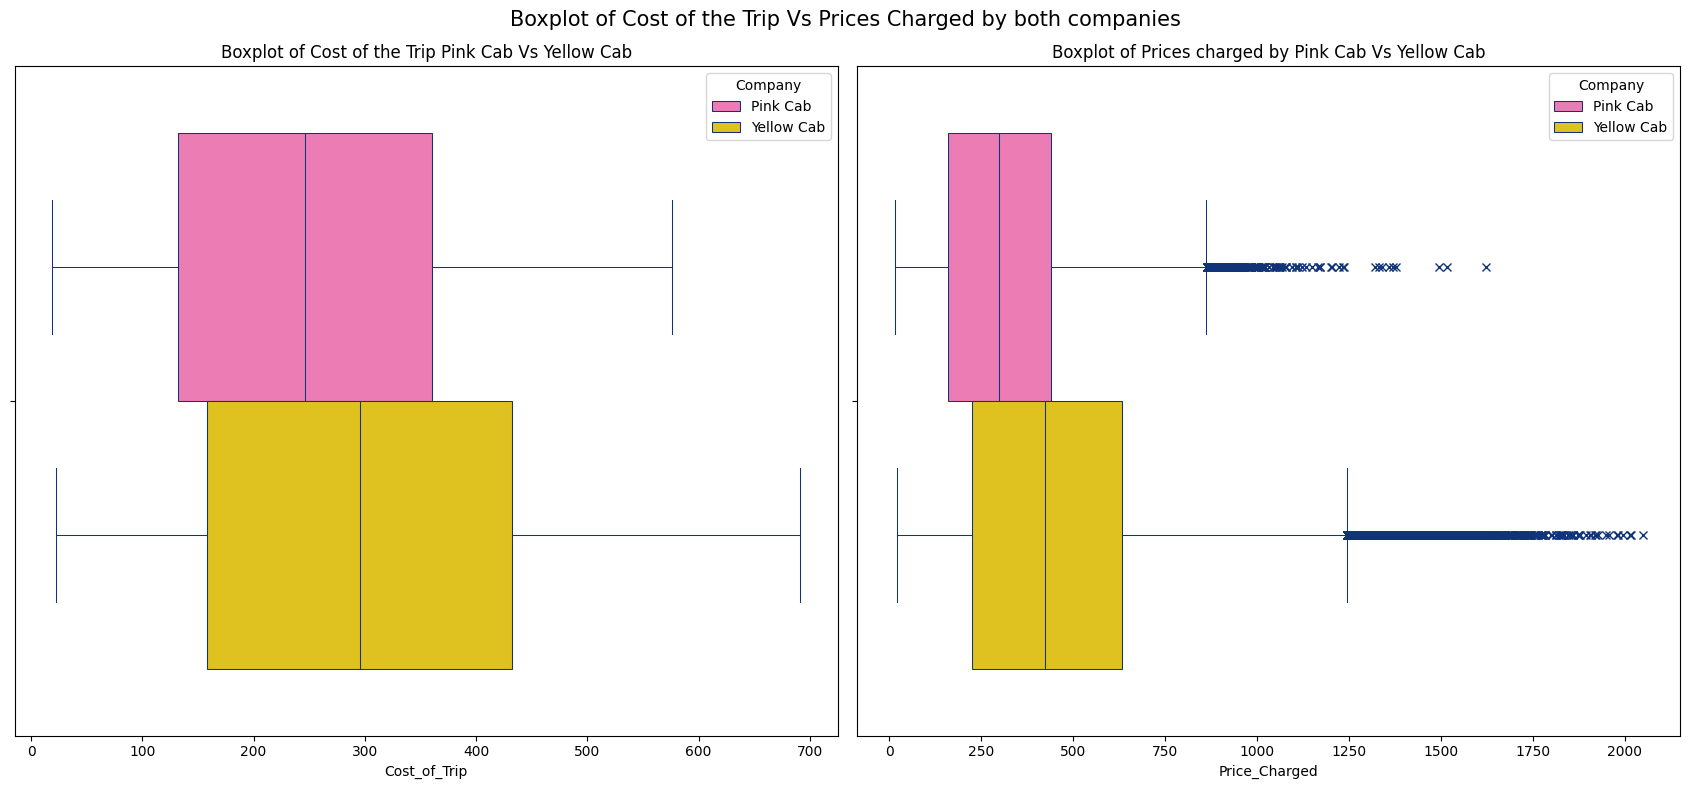

In [455]:
fig, axes = plt.subplots(1, 2, figsize=(17, 8))
palletes=['hotpink','gold']
fig.suptitle('Boxplot of Cost of the Trip Vs Prices Charged by both companies', fontsize=15)
sns.boxplot(data=data, x="Cost_of_Trip", hue="Company",palette=palletes,ax=axes[0],linecolor="#137", linewidth=.75,flierprops={"marker": "x"})
axes[0].set_title('Boxplot of Cost of the Trip Pink Cab Vs Yellow Cab')
sns.boxplot(data=data, x="Price_Charged", hue="Company",palette=palletes,ax=axes[1],linecolor="#137", linewidth=.75,flierprops={"marker": "x"})
axes[1].set_title('Boxplot of Prices charged by Pink Cab Vs Yellow Cab')
plt.tight_layout()
plt.show()

**2. Categorial  variables**

In [456]:
print(categorial_variables)

['Company', 'City', 'Day_of_week_name', 'Payment_Mode', 'Gender', 'Holiday']


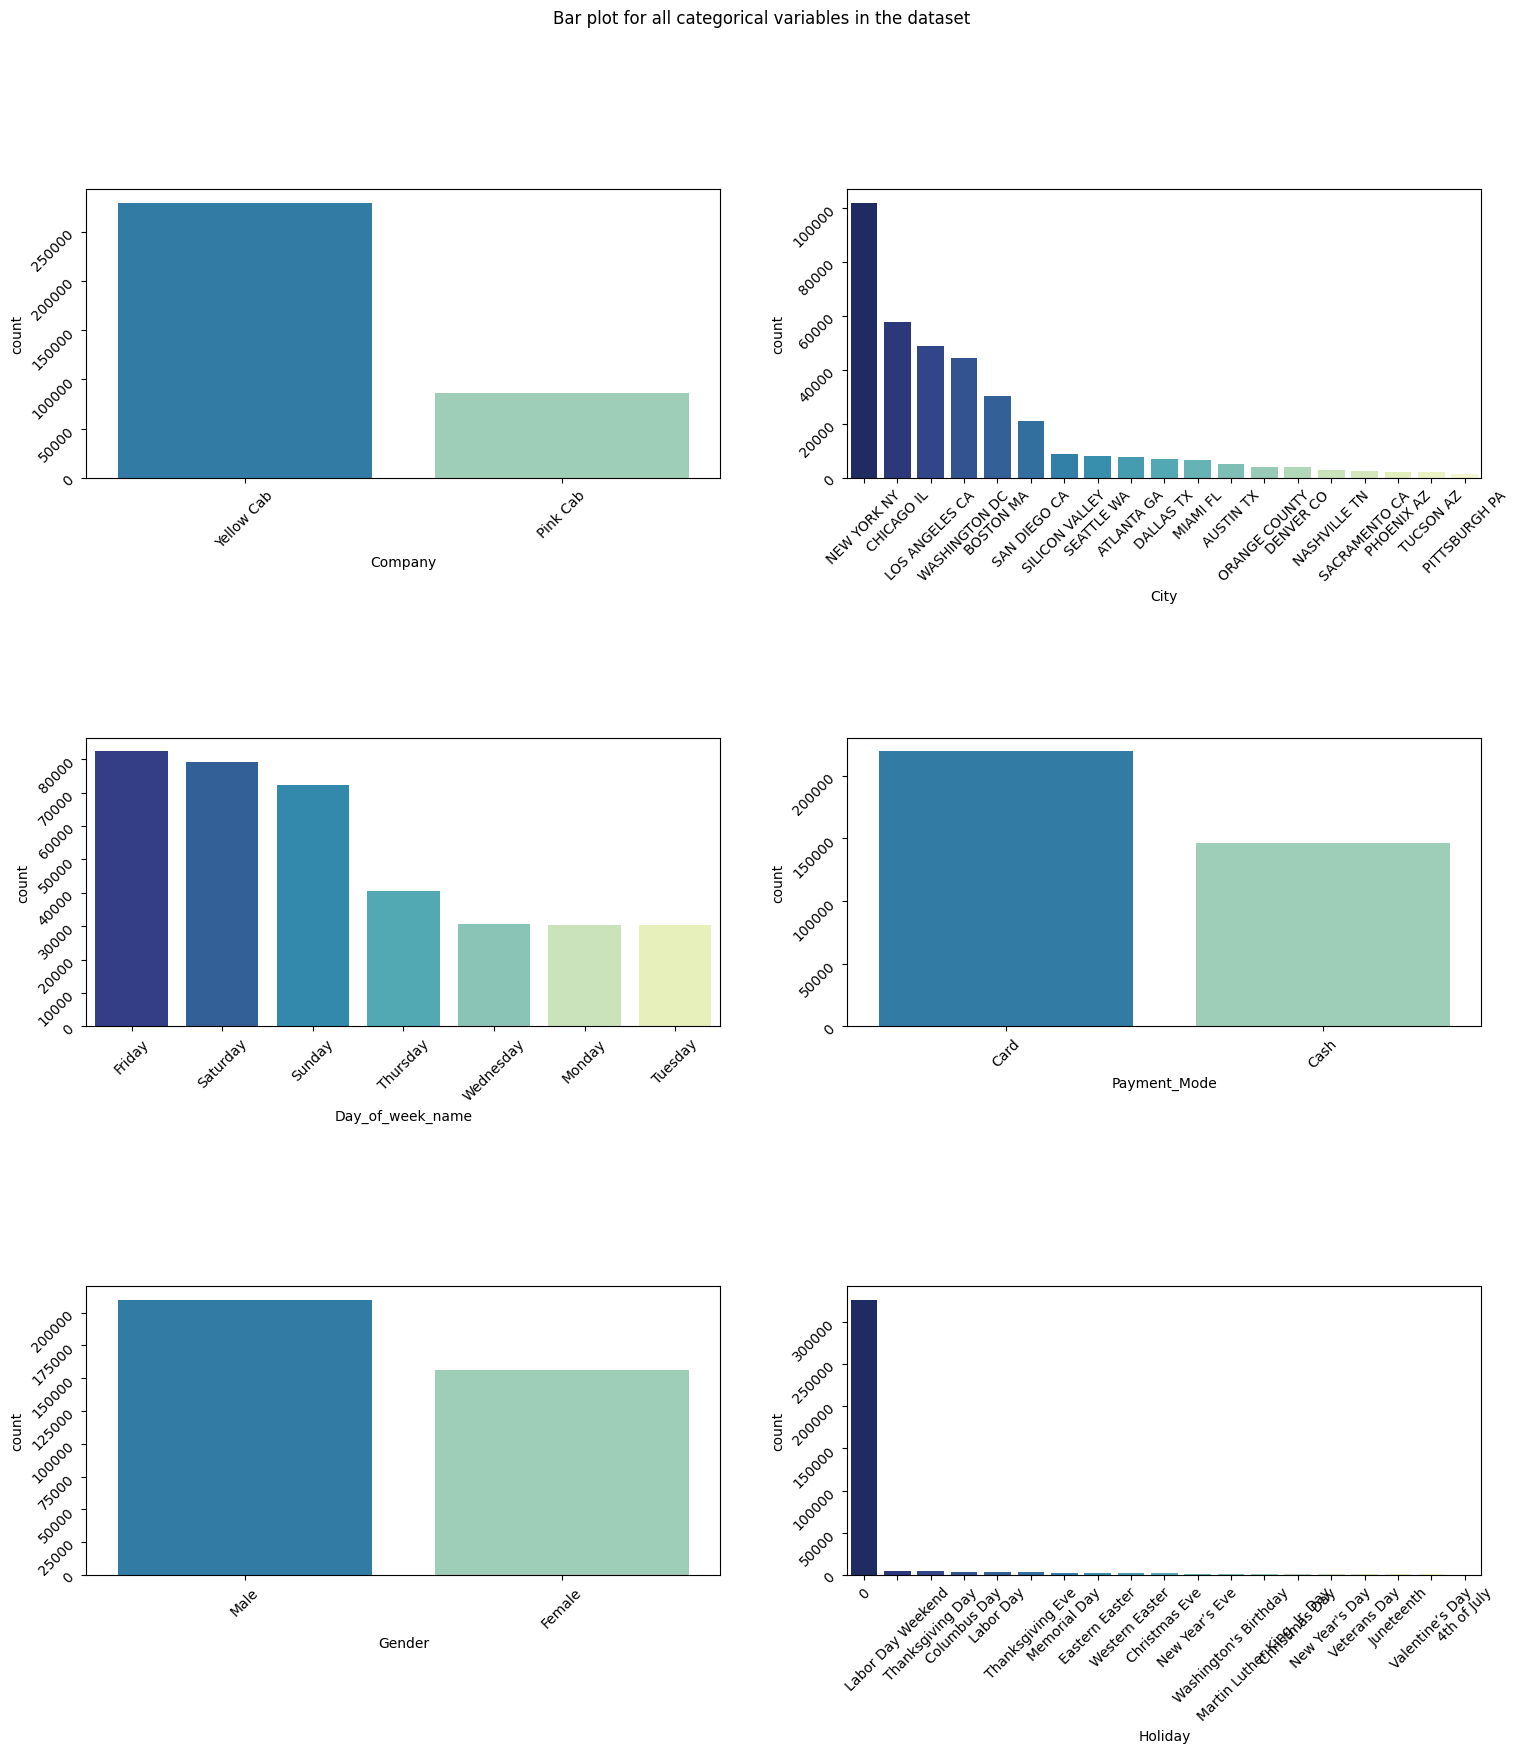

In [457]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18),gridspec_kw={'hspace': 0.9})
fig.suptitle('Bar plot for all categorical variables in the dataset')
p_color=['gold','hotpink']
g_color=['dodgerblue','deeppink']
pay_color=['greenyellow','yellowgreen']
sns.countplot(ax = axes[0, 0], x = 'Company', data = data, palette = 'YlGnBu_r',
              order = data['Company'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'City', data = data,  palette='YlGnBu_r',
              order = data['City'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Day_of_week_name', data = data, palette = 'YlGnBu_r',
              order = data['Day_of_week_name'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Payment_Mode', data = data, palette = 'YlGnBu_r',
              order = data['Payment_Mode'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Gender', data = data, palette = 'YlGnBu_r',
              order = data['Gender'].value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Holiday', data = data, palette = 'YlGnBu_r',
              order = data['Holiday'].value_counts().index);
for ax in axes.flatten():
    ax.tick_params(labelrotation=45)
plt.show()


# **Correlation Analysis**

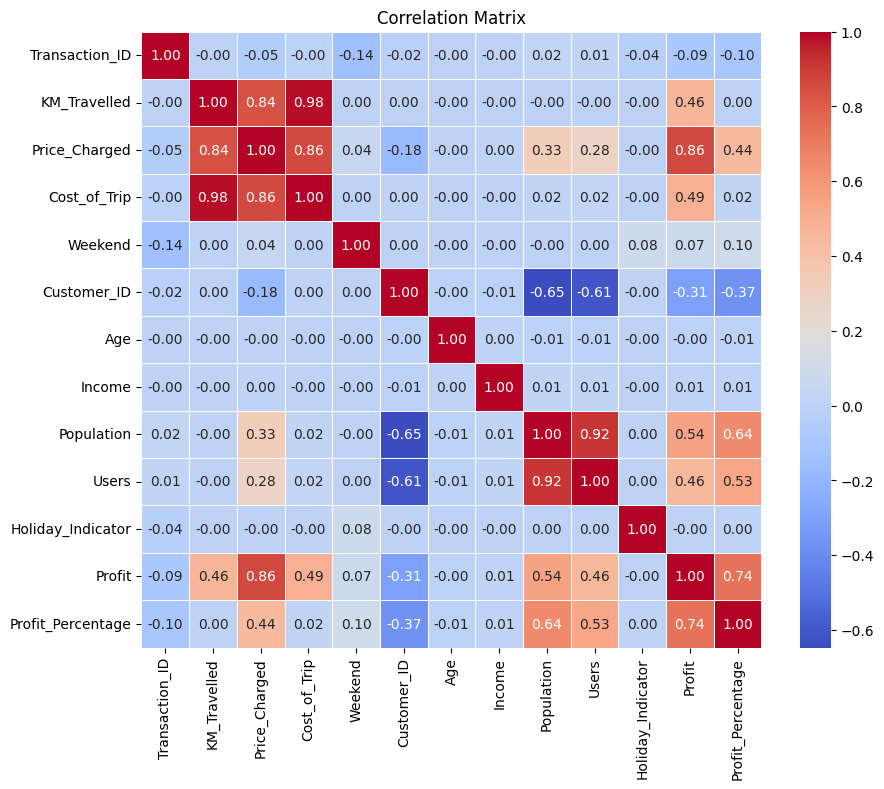

In [458]:
numerical_features = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()
#print("Correlation Matrix:")
#print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [459]:
PinkCab_df = data[data['Company']=='Pink Cab']
YellowCab_df = data[data['Company']=='Yellow Cab']
PinkCab_df.head(2)

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Travel_Date,Year,Month,Day,...,Payment_Mode,Gender,Age,Income,Population,Users,Holiday,Holiday_Indicator,Profit,Profit_Percentage
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.64,2016-01-08,2016,1,8,...,Card,Male,28,10813,814885,24701,0,0,57.32,15.45
4,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.85,2016-01-06,2016,1,6,...,Card,Male,27,9237,814885,24701,0,0,23.67,6.60


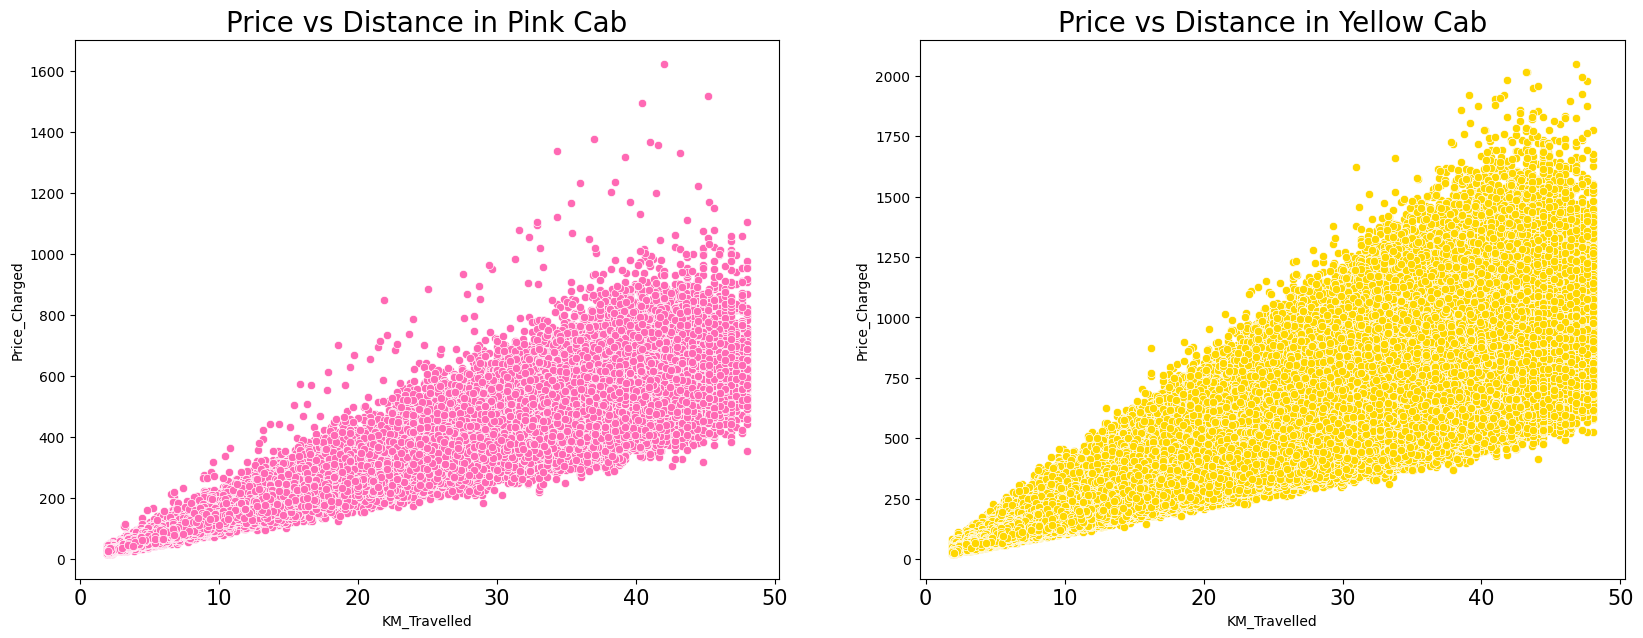

In [460]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 7))

sns.scatterplot(data=PinkCab_df, x='KM_Travelled', y='Price_Charged',color='hotpink', ax=ax1)
ax1.set_title('Price vs Distance in Pink Cab', fontsize=20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=15)

sns.scatterplot(data=YellowCab_df, x='KM_Travelled', y='Price_Charged',color='gold', ax=ax2)
ax2.set_title('Price vs Distance in Yellow Cab', fontsize=20)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, fontsize=15)

plt.show()

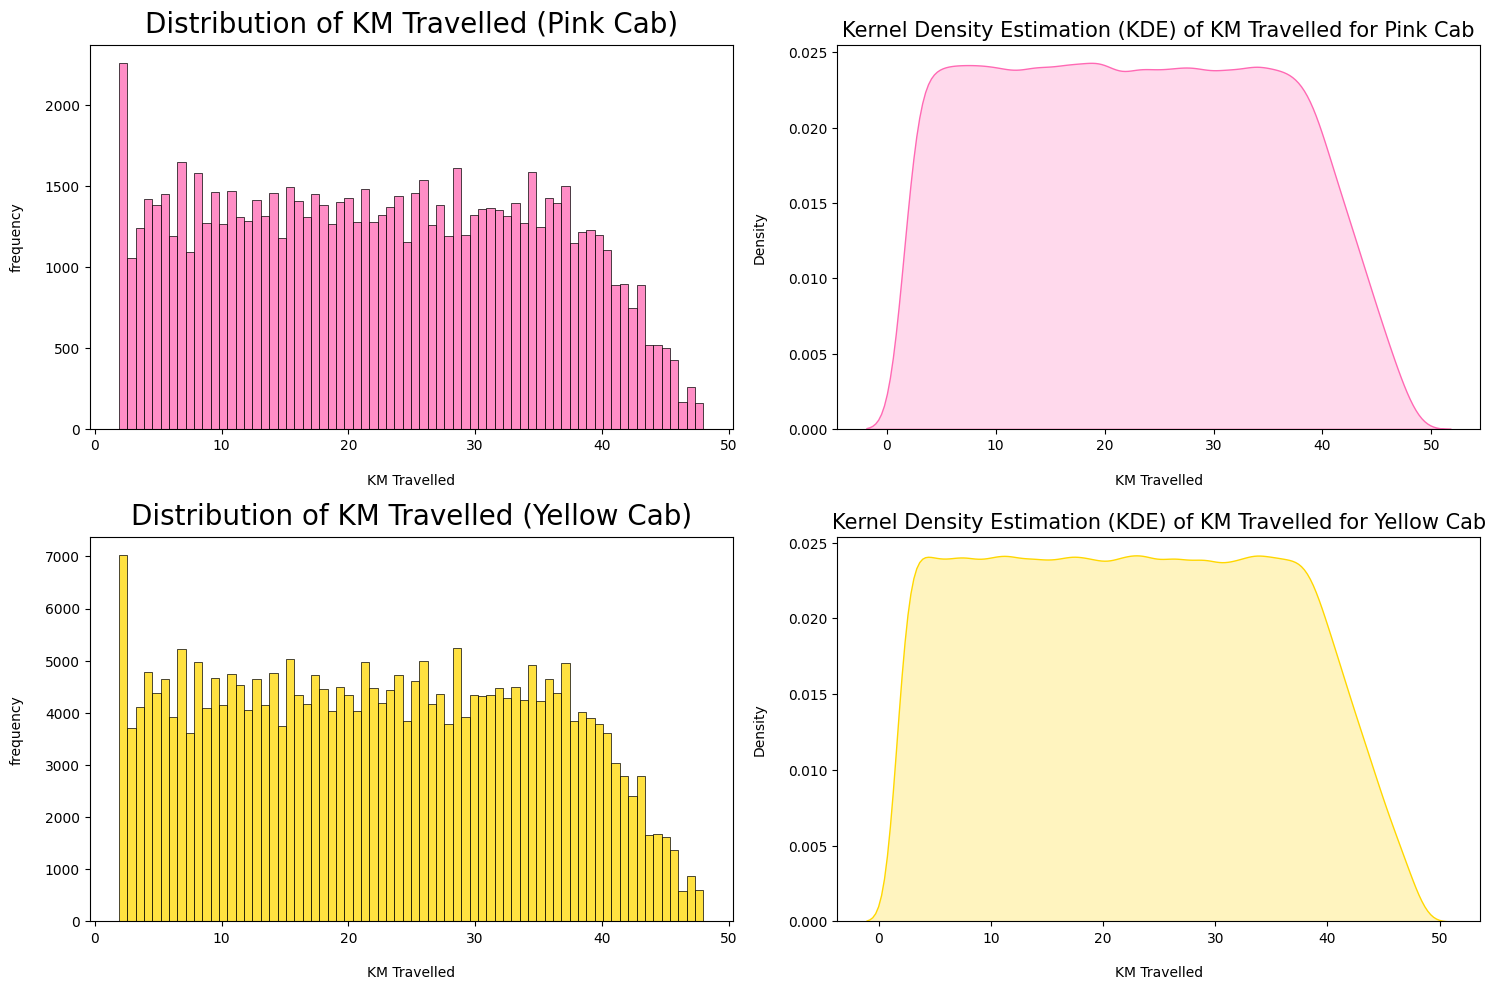

In [461]:
# Distribution and KDE plot for distribution of 'KM Travelled' for Pink Cab
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Distribution plot for Pink Cab
sns.histplot(PinkCab_df['KM_Travelled'], kde=False, color='hotpink', bins=70, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of KM Travelled (Pink Cab)", fontsize=20, y=1.012)
axes[0, 0].set_xlabel("KM Travelled", labelpad=15)
axes[0, 0].set_ylabel("frequency", labelpad=15)

# KDE plot for Pink Cab
sns.kdeplot(PinkCab_df['KM_Travelled'], shade=True, color='hotpink', ax=axes[0, 1])
axes[0, 1].set_xlabel('KM Travelled', labelpad=15)
axes[0, 1].set_ylabel('Density', labelpad=15)
axes[0, 1].set_title('Kernel Density Estimation (KDE) of KM Travelled for Pink Cab', fontsize=15)

# Distribution and KDE plot for distribution of 'KM Travelled' for Yellow Cab
sns.histplot(YellowCab_df['KM_Travelled'], kde=False, color='gold', bins=70, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of KM Travelled (Yellow Cab)", fontsize=20, y=1.012)
axes[1, 0].set_xlabel("KM Travelled", labelpad=15)
axes[1, 0].set_ylabel("frequency", labelpad=15)

# KDE plot for Yellow Cab
sns.kdeplot(YellowCab_df['KM_Travelled'], shade=True, color='gold', ax=axes[1, 1])
axes[1, 1].set_xlabel('KM Travelled', labelpad=15)
axes[1, 1].set_ylabel('Density', labelpad=15)
axes[1, 1].set_title('Kernel Density Estimation (KDE) of KM Travelled for Yellow Cab', fontsize=15)

plt.tight_layout()
plt.show()

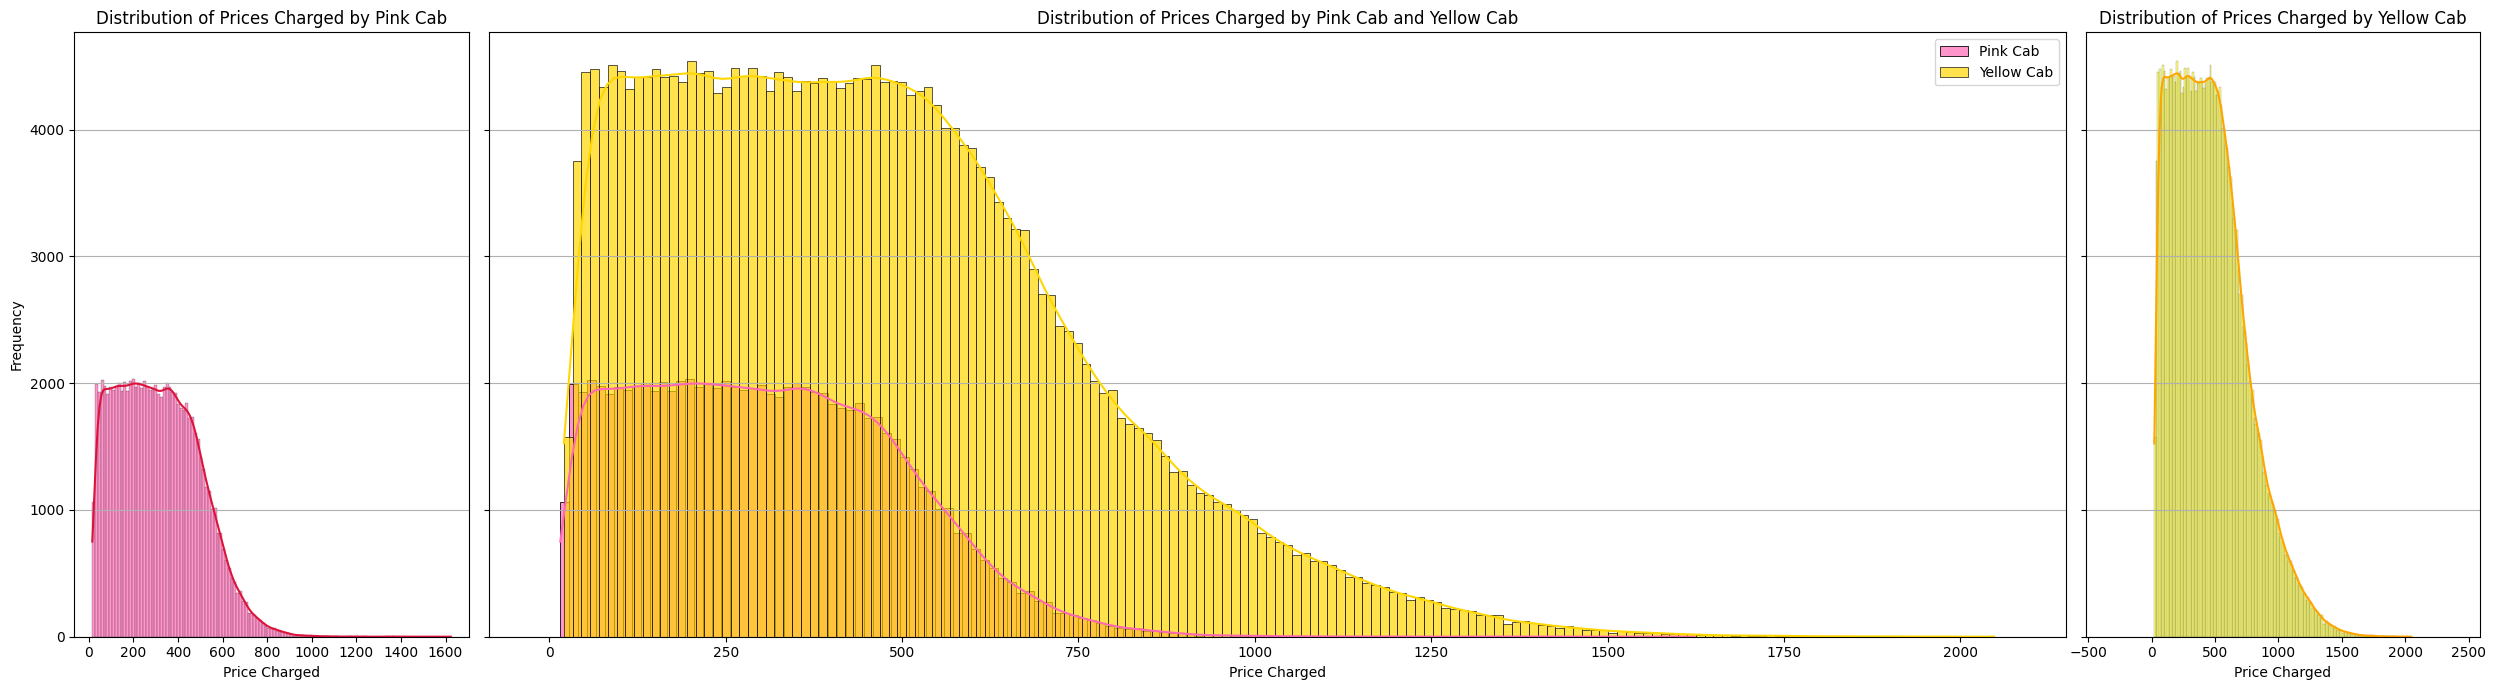

In [462]:
fig, axes = plt.subplots(1, 3, figsize=(25, 7), sharey=True, gridspec_kw={'width_ratios': [1, 4, 1]})

# Distribution plot for Pink Cab
sns.histplot(PinkCab_df['Price_Charged'], kde=True, color='hotpink', label='Pink Cab', ax=axes[0],alpha=0.7)
axes[0].lines[0].set_color('crimson')
axes[0].set_xlabel('Price Charged')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y')
axes[0].set_title('Distribution of Prices Charged by Pink Cab')

# Common center plot
sns.histplot(PinkCab_df['Price_Charged'], kde=True, color='hotpink', label='Pink Cab', ax=axes[1], alpha=0.7)
sns.histplot(YellowCab_df['Price_Charged'], kde=True, color='gold', label='Yellow Cab', ax=axes[1], alpha=0.7)
axes[1].set_xlabel('Price Charged')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Prices Charged by Pink Cab and Yellow Cab')
axes[1].grid(axis='y')
axes[1].legend()

# Distribution plot for Yellow Cab
sns.histplot(YellowCab_df['Price_Charged'], kde=True, color='yellow', label='Yellow Cab', ax=axes[2])#
axes[2].lines[0].set_color('orange')
axes[2].set_xlabel('Price Charged')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Prices Charged by Yellow Cab')
plt.grid(axis='y')
plt.axis('equal')
plt.tight_layout()
plt.show()


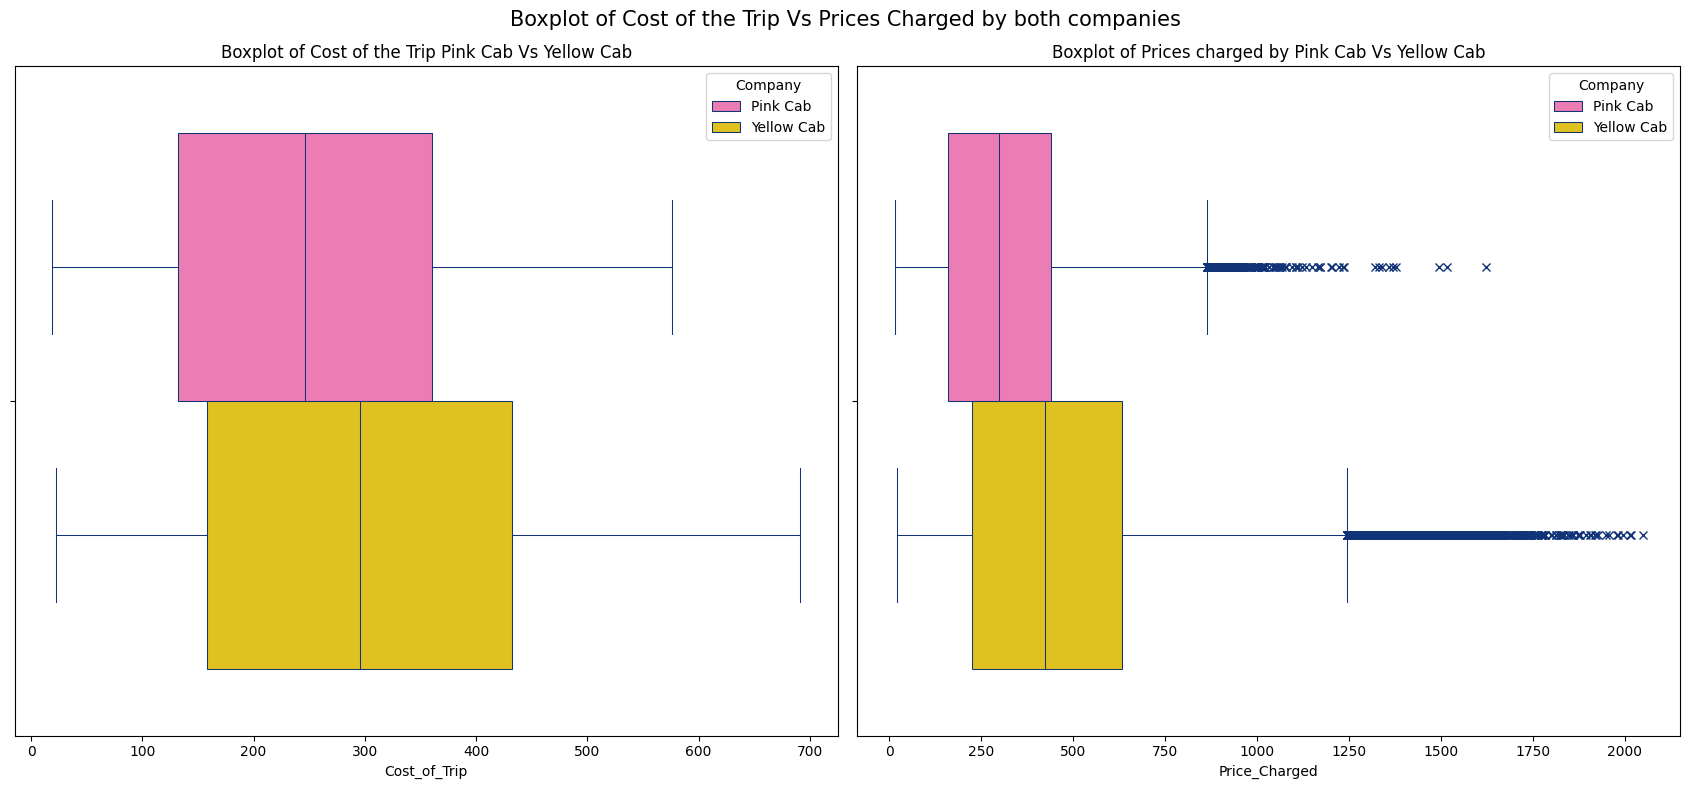

In [463]:
fig, axes = plt.subplots(1, 2, figsize=(17, 8))
palletes=['hotpink','gold']
fig.suptitle('Boxplot of Cost of the Trip Vs Prices Charged by both companies', fontsize=15)
sns.boxplot(data=df_cab, x="Cost_of_Trip", hue="Company",palette=palletes,ax=axes[0],linecolor="#137", linewidth=.75,flierprops={"marker": "x"})
axes[0].set_title('Boxplot of Cost of the Trip Pink Cab Vs Yellow Cab')
sns.boxplot(data=df_cab, x="Price_Charged", hue="Company",palette=palletes,ax=axes[1],linecolor="#137", linewidth=.75,flierprops={"marker": "x"})
axes[1].set_title('Boxplot of Prices charged by Pink Cab Vs Yellow Cab')
plt.tight_layout()
plt.show()

# **Overall sales Analysis**

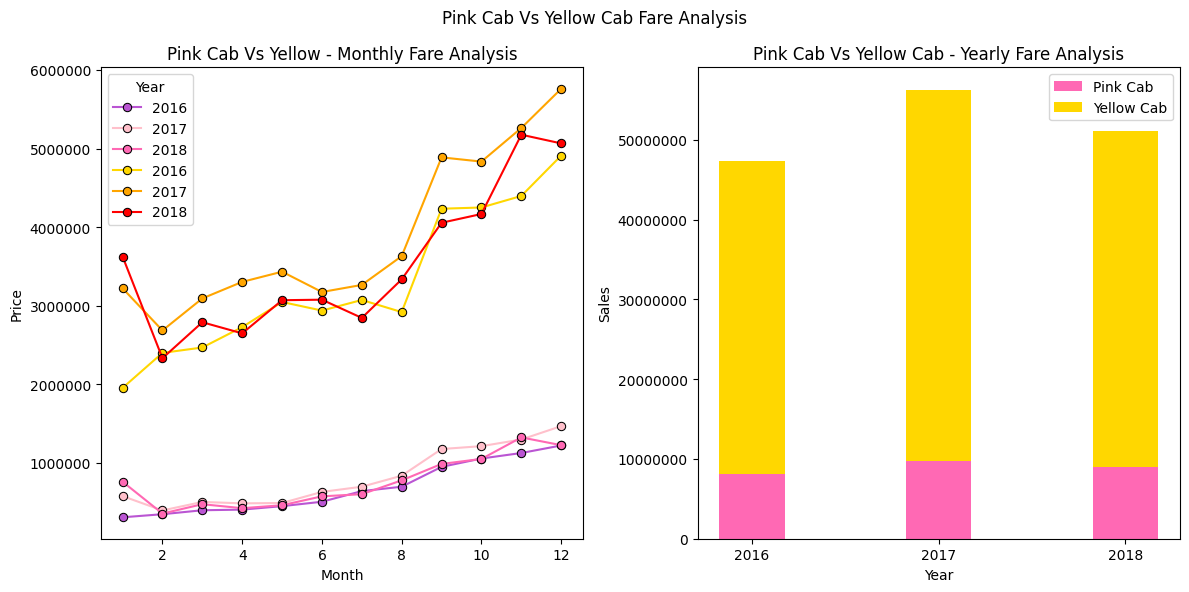

In [464]:
Pink_Cab_sales_by_year_month = PinkCab_df.groupby(['Year', 'Month'])['Price_Charged'].sum().reset_index()
Yellow_Cab_sales_by_year_month = YellowCab_df.groupby(['Year', 'Month'])['Price_Charged'].sum().reset_index()
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Pink Cab Vs Yellow Cab Fare Analysis')

pink_palettes = ['mediumorchid', 'pink', 'hotpink']
yellow_palettes = ['gold', 'orange', 'red']

# Pink Cab Line Plot
sns.lineplot(data=Pink_Cab_sales_by_year_month, x='Month', y='Price_Charged', hue='Year', marker='o', markeredgecolor='black', palette=pink_palettes, ax=axes[0])
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Price')
axes[0].set_title('Pink Cab Vs Yellow - Monthly Fare Analysis')
axes[0].ticklabel_format(axis='y', style='plain', useOffset=False)
axes[0].legend(title='Year')

# Yellow Cab Line Plot
sns.lineplot(data=Yellow_Cab_sales_by_year_month, x='Month', y='Price_Charged', hue='Year', marker='o', markeredgecolor='black', palette=yellow_palettes, ax=axes[0])
axes[0].legend(title='Year')

# Stacked Bar Plot
years = sorted(Pink_Cab_sales_by_year_month['Year'].unique())

# Extracting Pink Cab and Yellow Cab sales for each year
pink_sales = []
yellow_sales = []
for year in years:
    pink_sales.append(Pink_Cab_sales_by_year_month[Pink_Cab_sales_by_year_month['Year'] == year]['Price_Charged'].sum())
    yellow_sales.append(Yellow_Cab_sales_by_year_month[Yellow_Cab_sales_by_year_month['Year'] == year]['Price_Charged'].sum())

index = np.arange(len(years))
bar_width = 0.35

pink_bar = axes[1].bar(index, pink_sales, bar_width, label='Pink Cab', color='hotpink')
yellow_bar = axes[1].bar(index, yellow_sales, bar_width, label='Yellow Cab', color='gold', bottom=pink_sales)

axes[1].set_xlabel('Year')
axes[1].set_ylabel('Sales')
axes[1].set_title('Pink Cab Vs Yellow Cab - Yearly Fare Analysis')
axes[1].set_xticks(index)
axes[1].set_xticklabels(years)
axes[1].ticklabel_format(axis='y', style='plain', useOffset=False)
axes[1].legend()
plt.tight_layout()
plt.show()

# **Weekend Fare Analysis**
 The data analysis shows the significance of weekends as a prime revenue-generating period for both Pink Cab and Yellow Cab, highlighting the importance of strategic planning and operational excellence to optimize revenue performance during leisure periods

* **Weekend Revenue Comparison**
  Both Pink Cab and Yellow Cab demonstrate a significant increase in revenue during weekends compared to weekdays.

  **Pink Cab** the average revenue surges from approximately 303.18 during weekdays to about 321.25 during weekends, representing a percentage difference of approximately **5.96%**.

   **Yellow Cab** experiences a notable increase in average revenue during weekends, rising from approximately 447.84 during weekdays to about 472.26 during weekends. This corresponds to a percentage difference of approximately **5.45%**.



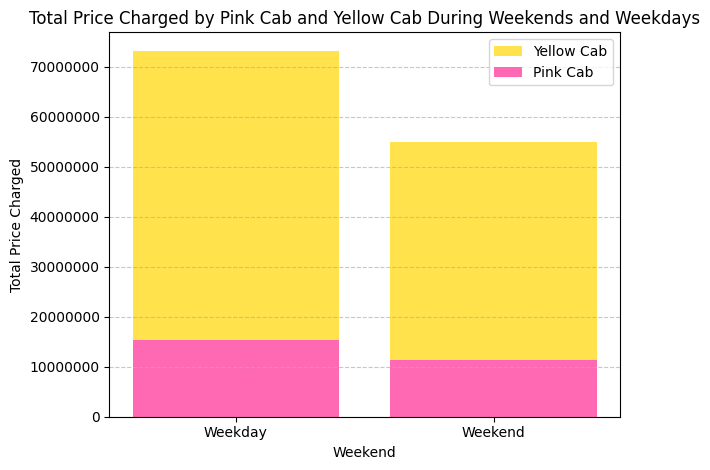

In [465]:
Pink_Cab_weekend = PinkCab_df.groupby('Weekend')['Price_Charged'].sum().reset_index()
Yellow_Cab_weekend = YellowCab_df.groupby('Weekend')['Price_Charged'].sum().reset_index()
#  Yellow Cab data
plt.bar(Yellow_Cab_weekend['Weekend'], Yellow_Cab_weekend['Price_Charged'], color='gold', label='Yellow Cab', alpha=0.7)
#  Pink Cab data
plt.bar(Pink_Cab_weekend['Weekend'], Pink_Cab_weekend['Price_Charged'], color='hotpink', label='Pink Cab')
plt.xlabel('Weekend')
plt.ylabel('Total Price Charged')
plt.title('Total Price Charged by Pink Cab and Yellow Cab During Weekends and Weekdays')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.ticklabel_format(axis='y', style='plain', useOffset=False)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

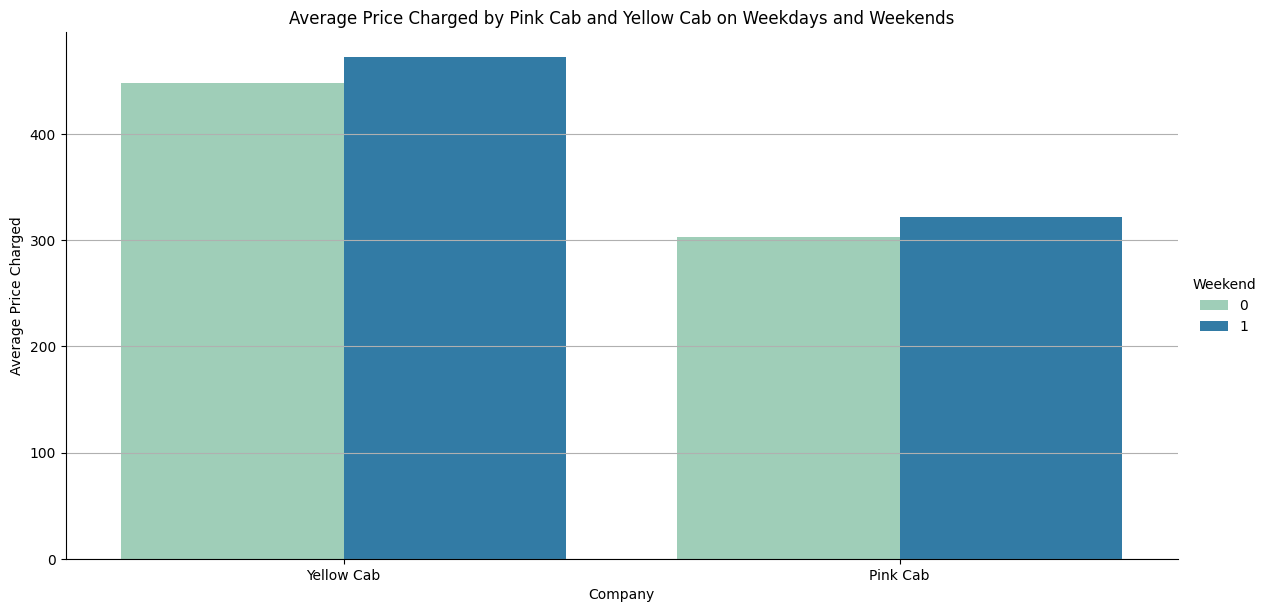

In [466]:
weekend_df = data.groupby(['Company', 'Weekend'])['Price_Charged'].mean().sort_values(ascending=False).reset_index()

#bar plot for comparison on weekdays and weekends
catplot = sns.catplot(x='Company', y='Price_Charged', hue='Weekend', data=weekend_df, kind='bar', height=6, aspect=2, palette='YlGnBu')

plt.ylabel('Average Price Charged')
plt.title('Average Price Charged by Pink Cab and Yellow Cab on Weekdays and Weekends')
plt.grid(axis='y')
plt.show()

In [467]:
price_comparison = data.groupby(['Company', 'Weekend'])['Price_Charged'].mean().reset_index()

comparison_table = price_comparison.pivot_table(index='Company', columns='Weekend', values='Price_Charged').reset_index()

comparison_table['Percentage_Difference'] = ((comparison_table[1] - comparison_table[0]) / comparison_table[0]) * 100
print(comparison_table)

Weekend     Company           0           1  Percentage_Difference
0          Pink Cab  303.176771  321.254441               5.962749
1        Yellow Cab  447.839339  472.255505               5.451992


# **Holiday Analysis**

It's important to note the divergence between the **distance traveled** and the **revenue generated**by **Pink Cab** during holiday periods compared to non-holiday periods.

Despite covering **fewer kilometers** during holidays, Pink Cab experiences a notable **increase in revenue**, while Yellow Cab demonstrates a** marginal decrease in revenue** during the same periods.

This discrepancy suggests that Pink Cab may have implemented strategies to optimize its revenue generation during holidays, such as implementing surge pricing, offering special promotions, or focusing on high-demand routes. These initiatives could have effectively offset the reduction in distance traveled, resulting in a net increase in revenue.

*  **Impact of US Holidays on Revenue**

  **Pink Cab** experiences a notable **increase** in revenue during holiday periods compared to non-holiday periods. Specifically, during holidays, Pink Cab's average revenue rises and this corresponds to a percentage difference of approximately ** 0.98%**, signifying a slight improvement in revenue during holidays.

  **Yellow Cab's** revenue demonstrates a marginal **decrease** during holiday periods in comparison to non-holiday periods.This translates to a percentage difference of approximately -0.19%, indicating a slight decline in revenue for Yellow Cab during holidays.

  These findings suggest that **Pink Cab** experiences a ***positive revenue impact during holiday periods***, while **Yellow Cab** sees a **minor reduction in revenue** during the same periods.

In [468]:
price_comparison_holiday = data.groupby(['Company', 'Holiday_Indicator'])['Price_Charged'].mean().sort_values(ascending=False).reset_index()
# Pivot the table to have Holiday and not a holiday
comparison_table_h = price_comparison_holiday.pivot_table(index='Company', columns='Holiday_Indicator', values='Price_Charged').reset_index()
# Calculate the percentage difference
comparison_table_h['Percentage_Difference'] = ((comparison_table_h[1] - comparison_table_h[0]) / comparison_table_h[0]) * 100
print(comparison_table_h)

Holiday_Indicator     Company           0           1  Percentage_Difference
0                    Pink Cab  310.260226  313.294387               0.977941
1                  Yellow Cab  458.075723  457.218399              -0.187158


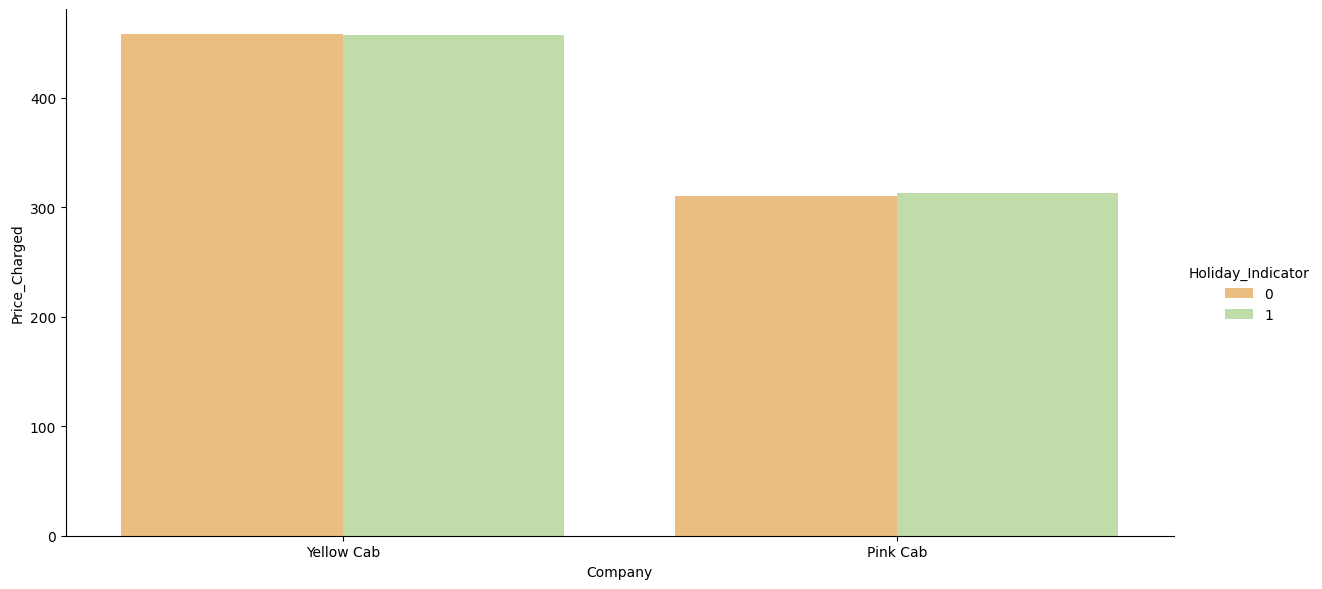

In [469]:
catplot = sns.catplot(x='Company', y='Price_Charged', hue='Holiday_Indicator', data=price_comparison_holiday, kind='bar', height=6, aspect=2, palette='Spectral')

* **Impact of US Holidays on Distance Traveled**

  For Pink Cab, there is a **slight decrease** in the average **distance traveled** during holiday periods. The average distance decreases from approximately 22.56 kilometers during non-holiday periods to about 22.51 kilometers during holiday periods. This reflects a percentage difference of approximately -0.25%.

  Conversely, **Yellow Cab** shows a slight **increase **in the **average distance** traveled during holiday periods compared to non-holiday periods. The average distance traveled increases from approximately 22.57 kilometers during non-holiday periods to about 22.58 kilometers during holiday periods, resulting in a percentage difference of approximately** 0.04%**.



In [470]:
price_comparison_holiday = data.groupby(['Company', 'Holiday_Indicator'])['KM_Travelled'].mean().sort_values(ascending=False).reset_index()
# Pivot the table to have Holiday and not a holiday
comparison_table_h = price_comparison_holiday.pivot_table(index='Company', columns='Holiday_Indicator', values='KM_Travelled').reset_index()
# Calculate the percentage difference
comparison_table_h['Percentage_Difference'] = ((comparison_table_h[1] - comparison_table_h[0]) / comparison_table_h[0]) * 100
print(comparison_table_h)

Holiday_Indicator     Company          0          1  Percentage_Difference
0                    Pink Cab  22.561297  22.505816              -0.245912
1                  Yellow Cab  22.566986  22.575793               0.039023


In [471]:
price_comparison_holiday = data.groupby(['Company', 'Holiday_Indicator'])['KM_Travelled'].sum().sort_values(ascending=False).reset_index()

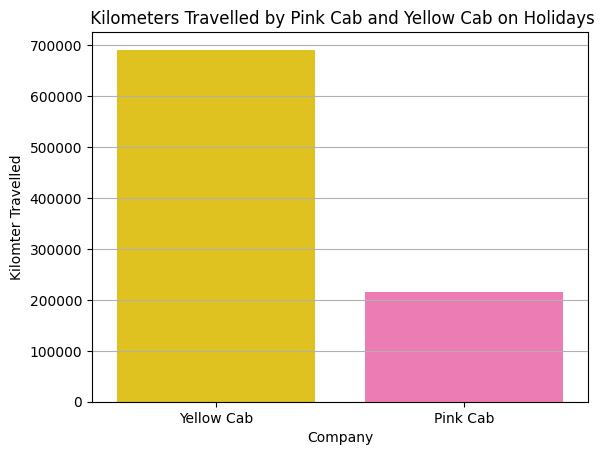

In [472]:
price_comparison_holidays=price_comparison_holiday[price_comparison_holiday['Holiday_Indicator']==1]
colors=['gold','hotpink']
sns.barplot(x='Company', y='KM_Travelled', data=price_comparison_holidays, palette=colors)

plt.ylabel('Kilomter Travelled')
plt.title(' Kilometers Travelled by Pink Cab and Yellow Cab on Holidays')
plt.grid(axis='y')
plt.show()

* **Top and Low Revenue Months for Pink Cab and Yellow Cab**

  The analysis reveals that **December** stands out as the **top revenue-generating** month for both **Pink Cab and Yellow Cab**. This observation aligns with broader **seasonal trends**, as December typically witnesses heightened consumer activity and increased travel demand associated with holiday festivities.

  Conversely, **February** emerges as the **low revenue** month for **both cab companies**.
  
  This trend may reflect a** post-holiday downturn** in travel demand and consumer spending, characteristic of the early months of the year

In [473]:
month_revenue = data.groupby(['Company', 'Holiday', 'Month','Day'])['Price_Charged'].sum().reset_index()

pink_cab_monthly_revenue = month_revenue[month_revenue['Company'] == 'Pink Cab']
yellow_cab_monthly_revenue = month_revenue[month_revenue['Company'] == 'Yellow Cab']


pink_cab_top_month = pink_cab_monthly_revenue.groupby('Month')['Price_Charged'].sum().idxmax()
yellow_cab_top_month = yellow_cab_monthly_revenue.groupby('Month')['Price_Charged'].sum().idxmax()

pink_cab_low_month = pink_cab_monthly_revenue.groupby('Month')['Price_Charged'].sum().idxmin()
yellow_cab_low_month = yellow_cab_monthly_revenue.groupby('Month')['Price_Charged'].sum().idxmin()

print("Top revenue month for Pink Cab:", pink_cab_top_month)
print("Top revenue month for Yellow Cab:", yellow_cab_top_month)
print("Low revenue month for Pink Cab:", pink_cab_low_month)
print("Low revenue month for Yellow Cab:", yellow_cab_low_month)

Top revenue month for Pink Cab: 12
Top revenue month for Yellow Cab: 12
Low revenue month for Pink Cab: 2
Low revenue month for Yellow Cab: 2


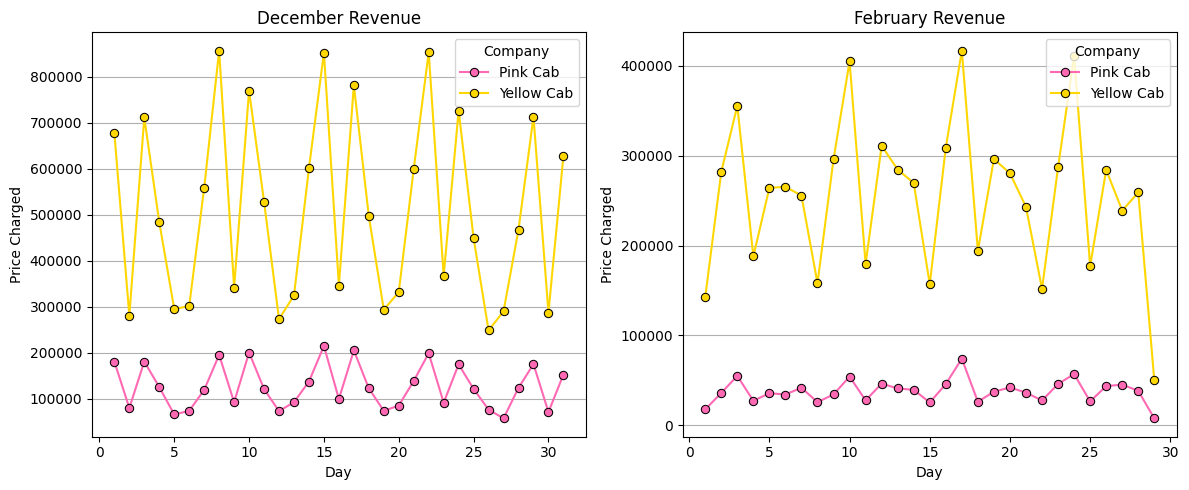

In [474]:
#Fetch Decemeber and Feburary Month
Dec_month_df=month_revenue[month_revenue['Month']==12]
Feb_month_df=month_revenue[month_revenue['Month']==2]

plt.figure(figsize=(12, 5))
colors=['hotpink','gold']
plt.subplot(1, 2, 1)
sns.lineplot(data=Dec_month_df, x='Day', y='Price_Charged', hue='Company', marker='o', markeredgecolor='black', palette=colors)
plt.title('December Revenue')
plt.grid(axis='y')
plt.xlabel('Day')
plt.ylabel('Price Charged')

plt.subplot(1, 2, 2)
sns.lineplot(data=Feb_month_df, x='Day', y='Price_Charged', hue='Company', marker='o', markeredgecolor='black', palette=colors)
plt.title('February Revenue')
plt.xlabel('Day')
plt.ylabel('Price Charged')

plt.grid(axis='y')
plt.tight_layout()
plt.show()


# **Revenue Analysis in each City**

Upon examining revenue data, it becomes evident that **``Yellow Cab``** has consistently generated higher revenue overall compared to **``Pink Cab``**.

In specific instances, **Pink Cab** achieved its highest revenue in **New York**
during the year **2016**. However, in subsequent years, namely 2017 and 2018, **Silicon Valley** emerged as the leading revenue-generating city for Pink Cab. Notably, there were ***variations*** in the third-ranking city each year, with *``Miami, Austin, and Orange County``* occupying the position in 2016, 2017, and 2018, respectively.

Conversely, **Yellow Cab** maintained its revenue dominance in New York across all three years. Additionally,** Silicon Valley and Dalla**s consistently secured the second and third positions, respectively, in revenue generation for Yellow Cab throughout the same period.


In [475]:
City_Comparison = data.groupby(['Company', 'City','Year','Month'])['Price_Charged'].mean().sort_values(ascending=False).reset_index()

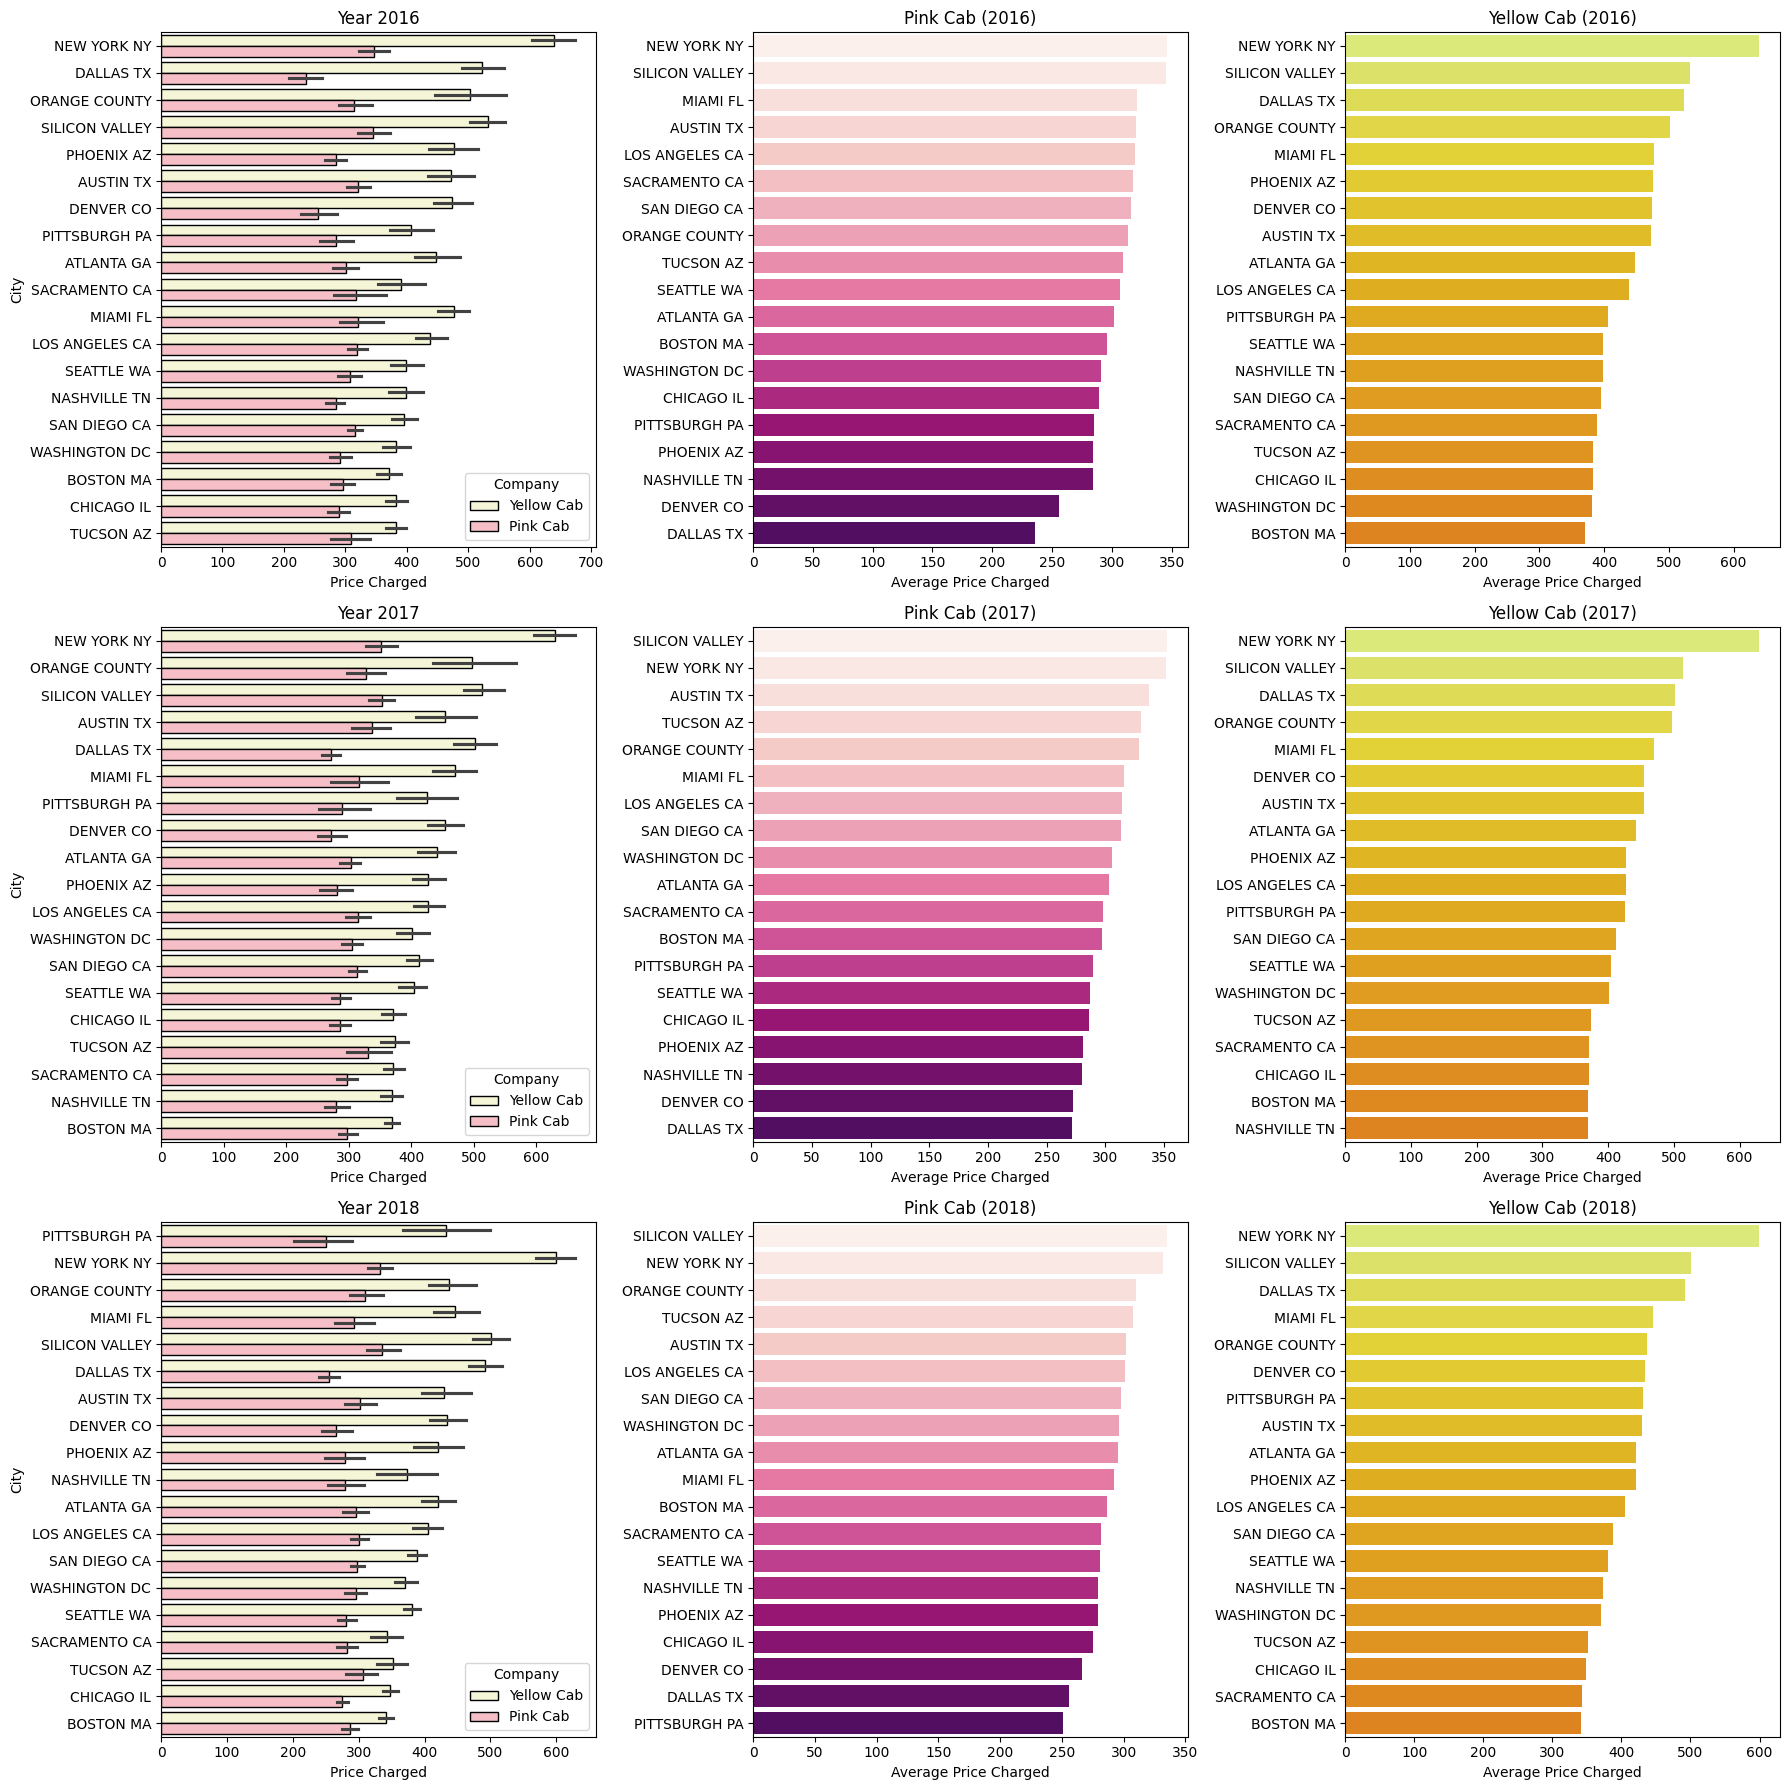

In [476]:
years = sorted(City_Comparison['Year'].unique())
colors = ['#FAFAD2','#FFB6C1']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))

for i, year in enumerate(years):
    year_data = City_Comparison[City_Comparison['Year'] == year]

    # Plot comparison of Pink Cab and Yellow Cab prices for each year
    sns.barplot(x='Price_Charged', y='City', hue='Company', data=year_data, ax=axes[i, 0], palette=colors,edgecolor='black')
    axes[i, 0].set_xlabel('Price Charged')
    axes[i, 0].set_ylabel('City')
    axes[i, 0].set_title(f'Year {year}')

    # Plot average price charged by Pink Cab in each city (descending order)
    pink_cab_prices = year_data[year_data['Company'] == 'Pink Cab'].groupby('City')['Price_Charged'].mean().sort_values(ascending=False)
    sns.barplot(x=pink_cab_prices.values, y=pink_cab_prices.index, ax=axes[i, 1], palette='RdPu')
    axes[i, 1].set_xlabel('Average Price Charged')
    axes[i, 1].set_ylabel('')
    axes[i, 1].set_title(f'Pink Cab ({year})')

    # Plot average price charged by Yellow Cab in each city (descending order)
    yellow_cab_prices = year_data[year_data['Company'] == 'Yellow Cab'].groupby('City')['Price_Charged'].mean().sort_values(ascending=False)
    sns.barplot(x=yellow_cab_prices.values, y=yellow_cab_prices.index, ax=axes[i, 2], palette='Wistia')
    axes[i, 2].set_xlabel('Average Price Charged')
    axes[i, 2].set_ylabel('')
    axes[i, 2].set_title(f'Yellow Cab ({year})')

plt.tight_layout()
plt.show()


* **Max and Min Trip charges**`

  we find that for **Pink Cab**, the minimum cost of a trip charged is ``$19.0``, while the maximum cost reaches ``$576.0``.
  
  On the other hand, for **Yellow Cab** the minimum trip cost is ``$22.8``, with the highest cost peaking at ``$691.2``.

In [477]:
print('Pink Cab')
print('Minimum cost of the trip charged $',PinkCab_df['Cost_of_Trip'].min())
print('Maximum cost of the trip charged $',PinkCab_df['Cost_of_Trip'].max())
print('\nYellow Cab')
print('Minimum cost of the trip charged $',YellowCab_df['Cost_of_Trip'].min())
print('Maximum cost of the trip charged $',YellowCab_df['Cost_of_Trip'].max())

Pink Cab
Minimum cost of the trip charged $ 19.0
Maximum cost of the trip charged $ 576.0

Yellow Cab
Minimum cost of the trip charged $ 22.8
Maximum cost of the trip charged $ 691.2


# **Profit Analysis**

* **Profit margins**

  **Profit margins** between Pink Cab and Yellow Cab over a three year period shows that **Yellow Cab** has **more** Profit than **Pink Cab**

Text(0.5, 1.0, 'Profit % per year')

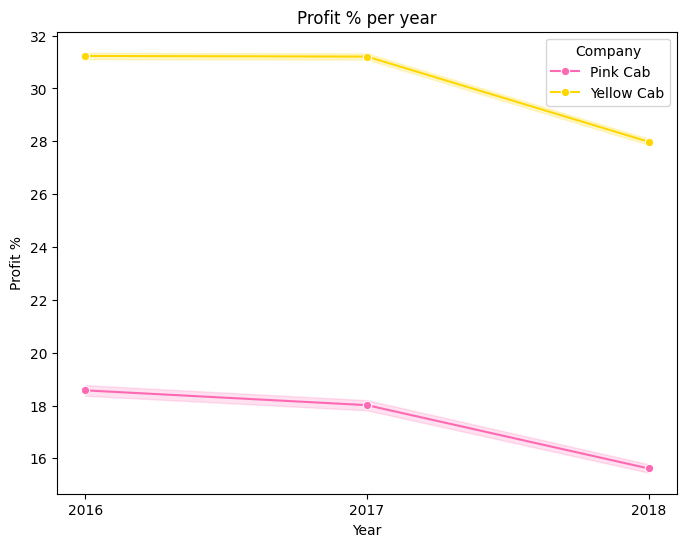

In [478]:
plt.figure(figsize=(8,6))
palettes =['hotpink','gold']
sns.lineplot(x='Year', y='Profit_Percentage', hue="Company", data=data, marker='o',palette=palettes)
plt.xlabel("Year")
plt.ylabel("Profit %")
plt.xticks( [2016, 2017, 2018], ['2016', '2017', '2018'])
plt.title("Profit % per year")

*  **Revenue vs. Profit Margin**

  The analysis of profitability trends over a three-year period reveals significant insights into the financial performance of Pink Cab and Yellow Cab. **Pink Cab** exhibited a consistent growth trajectory in profitability from 2016 to 2017, followed by a slight decline in 2018.
    
  Conversely, **Yellow Cab** demonstrated robust profitability throughout the same period. Despite fluctuations, both companies maintained relatively stable profit margins. These findings underscore Yellow Cab's sustained profitability and market dominance compared to Pink Cab, positioning it as a more promising investment opportunity for potential stakeholders.

    While **Yellow Cab** maintains a significantly **higher average profit** due to its **larger revenue base**, **Pink Cab** exhibits **a more consistent profit** margin around 10.3% to 10.9%. **Pink Cab** operates with a potentially leaner cost but they **extract a larger portion of their revenue** as profit despite a lower overall income.


  

In [527]:
company_profit = data.groupby(['Company', 'Year'])['Profit'].sum().reset_index()

In [480]:
total_profit_yearly = company_profit.groupby('Year')['Profit'].sum()

In [526]:
company_profit['Profit_Percentage'] = company_profit.apply(lambda row: (row['Profit'] / total_profit_yearly[row['Year']]) * 100, axis=1)
print(company_profit)

      Company  Year       Profit  Price_Charged  Profit_Percentage
0    Pink Cab  2016   1746800.90     8074706.89          10.930593
1    Pink Cab  2017   2062166.41     9741745.46          10.921193
2    Pink Cab  2018   1583973.15     8987765.15          10.367708
3  Yellow Cab  2016  14234041.54    39305337.21          89.069407
4  Yellow Cab  2017  16820078.50    46539663.37          89.078807
5  Yellow Cab  2018  13693975.43    42175109.70          89.632292


In [531]:
company_profit.to_csv('/content/drive/My Drive/OUTPUT_CSV/Company_Profit.csv', encoding='utf-8', index=False)

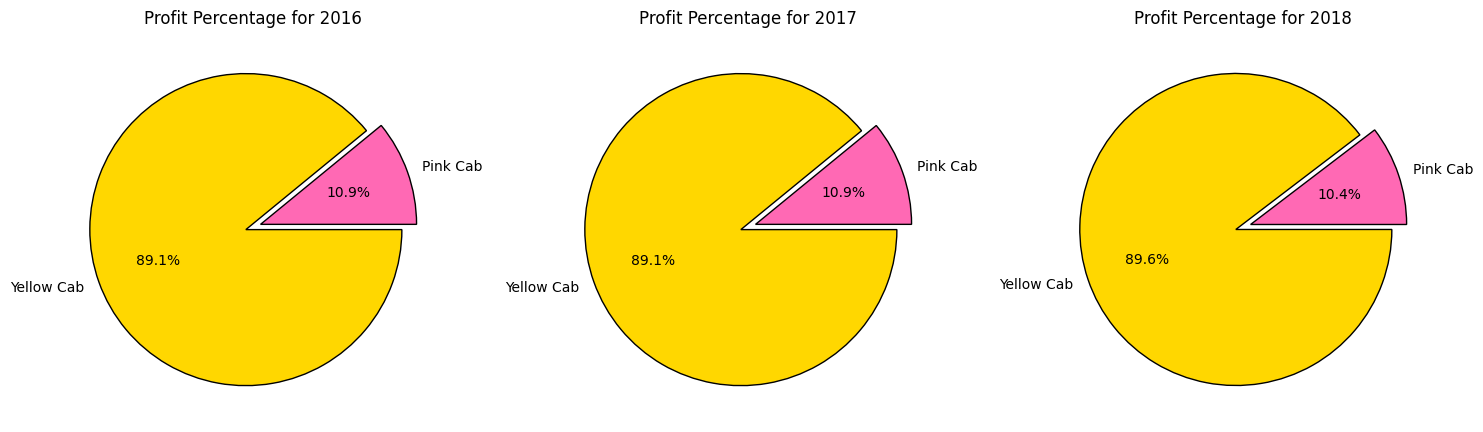

In [482]:
years = np.sort(data['Year'].unique())
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
colors=['hotpink','gold']
for i, year in enumerate(years):
    profit_data_year = company_profit[company_profit['Year'] == year]
    ax = axes[i]
    ax.pie(profit_data_year['Profit_Percentage'], labels=profit_data_year['Company'],explode=[0.05]*2, autopct='%1.1f%%', colors=colors, wedgeprops={'edgecolor': 'black'})
    ax.set_title(f'Profit Percentage for {year}')
plt.tight_layout()
plt.show()

In [ ]:
cab1_data = company_profit[company_profit['Company'] == 'Yellow Cab']
cab2_data = company_profit[company_profit['Company'] == 'Pink Cab']

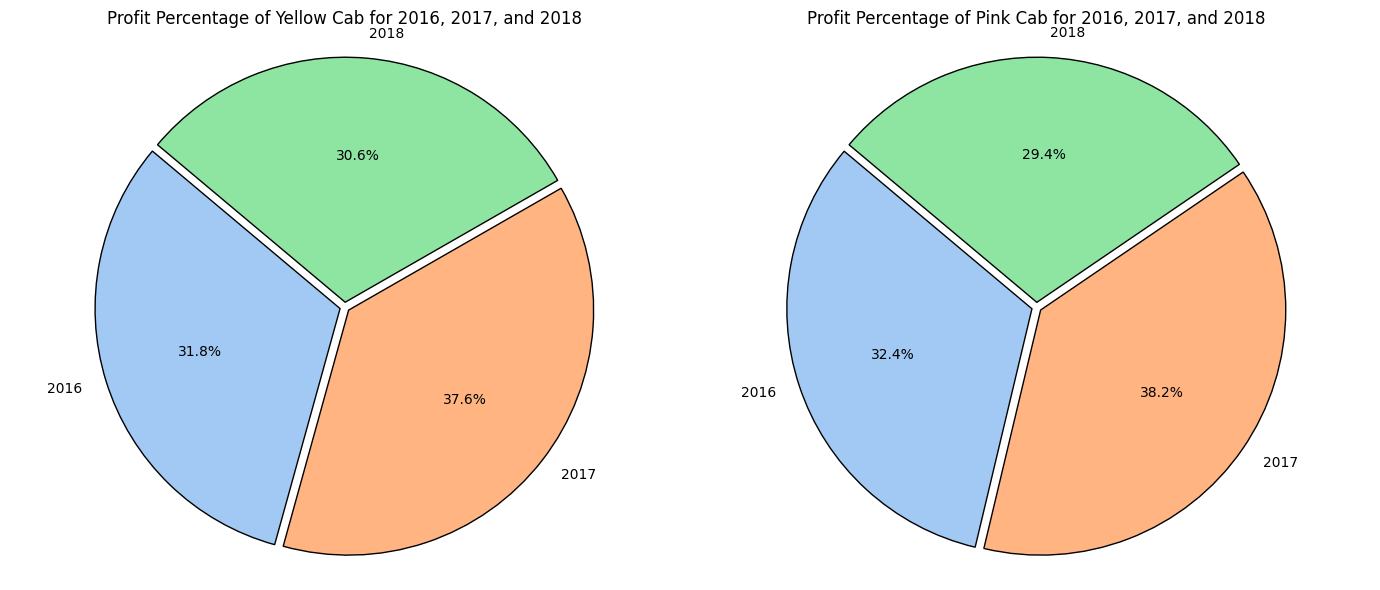

In [557]:
# Filtered data for Cab1 and Cab2 for the specified years
cab1_filtered_data = cab1_data[cab1_data['Year'].isin([2016, 2017, 2018])]
cab2_filtered_data = cab2_data[cab2_data['Year'].isin([2016, 2017, 2018])]

# Calculate profit percentage for Cab1 and Cab2
total_profit_cab1 = cab1_filtered_data['Profit'].sum()
cab1_filtered_data['Profit_Percentage'] = cab1_filtered_data['Profit'] / total_profit_cab1 * 100

total_profit_cab2 = cab2_filtered_data['Profit'].sum()
cab2_filtered_data['Profit_Percentage'] = cab2_filtered_data['Profit'] / total_profit_cab2 * 100

# Explode for both plots
explode = (0.02, 0.02, 0.02)
cab_palette = plt.get_cmap('Blues')

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Cab1
axs[0].pie(cab1_filtered_data['Profit_Percentage'], labels=cab1_filtered_data['Year'], autopct='%1.1f%%', startangle=140, explode=explode, wedgeprops={'edgecolor': 'black'})
axs[0].set_title('Profit Percentage of Yellow Cab for 2016, 2017, and 2018')
axs[0].axis('equal')

# Plot for Cab2
axs[1].pie(cab2_filtered_data['Profit_Percentage'], labels=cab2_filtered_data['Year'], autopct='%1.1f%%', startangle=140, explode=explode, wedgeprops={'edgecolor': 'black'})
axs[1].set_title('Profit Percentage of Pink Cab for 2016, 2017, and 2018')
axs[1].axis('equal')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


In [559]:
print(cab2_filtered_data)

    Company  Year      Profit  Profit_Percentage
0  Pink Cab  2016  1746800.90          32.390510
1  Pink Cab  2017  2062166.41          38.238257
2  Pink Cab  2018  1583973.15          29.371234


In [560]:
print(cab1_filtered_data)

      Company  Year       Profit  Profit_Percentage
3  Yellow Cab  2016  14234041.54          31.809268
4  Yellow Cab  2017  16820078.50          37.588367
5  Yellow Cab  2018  13693975.43          30.602365


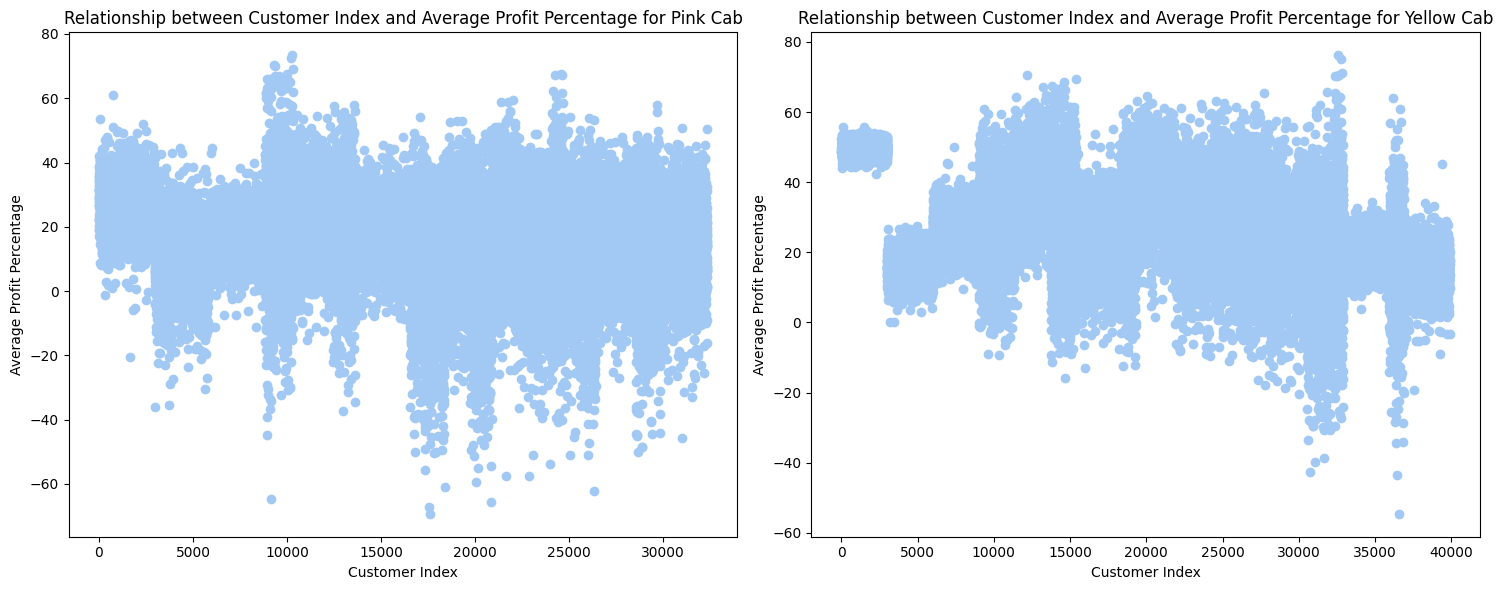

In [514]:
unique_companies = data['Company'].unique()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Iterate over each company
for i, company in enumerate(unique_companies):
    subset_data = data[data['Company'] == company][['Customer_ID', 'Profit_Percentage']]
    customer_profit_mean = subset_data.groupby('Customer_ID')['Profit_Percentage'].mean()
    total_customers = customer_profit_mean.shape[0]

    ax = axes[i]
    ax.scatter(range(total_customers), customer_profit_mean.values)
    ax.set_xlabel('Customer Index')
    ax.set_ylabel('Average Profit Percentage')
    ax.set_title(f'Relationship between Customer Index and Average Profit Percentage for {company}')

plt.tight_layout()
plt.show()



* **Coefficient of Variation (CV) for each company**

  **Yellow Cab** exhibits a **lower CV** compared to Pink Cab, indicating relatively **stable profits**. Their average profit is also significantly higher than Pink Cab's. While they have a higher standard deviation in terms of absolute values, it's proportionally smaller compared to their mean profit. This suggests Yellow Cab maintains **consistent profits** despite some variation across trips.

  **Pink Cab** has a **higher CV** compared to Yellow Cab, suggesting greater variability in profits. Their average profit is also considerably lower. This implies Pink Cab's **profits fluctuate** more significantly across trips, with a standard deviation close to their average profit.

In [512]:
company_std_dev = data.groupby('Company')['Profit'].std()
company_mean = data.groupby('Company')['Profit'].mean()
company_cv = company_std_dev / company_mean
most_stable_companies = company_cv.sort_values(ascending=True)
print("Coefficient of Variation (CV) for each company:")
print(most_stable_companies)
print('company_mean',company_mean,'company_std_dev',company_std_dev)

Coefficient of Variation (CV) for each company:
Company
Yellow Cab    1.072619
Pink Cab      1.237708
Name: Profit, dtype: float64
company_mean Company
Pink Cab       62.491344
Yellow Cab    160.082765
Name: Profit, dtype: float64 company_std_dev Company
Pink Cab       77.346064
Yellow Cab    171.707868
Name: Profit, dtype: float64


* **Trips: Quarterly Trends**

  While **Yellow Cab** maintained a **relatively steady growth** rate in trip numbers over the years, **Pink Cab** exhibited a **more dynamic growth pattern**, with accelerated growth observed in the latter half of 2017 and continuing into 2018.

  **``2016:``** Both Pink Cab and Yellow Cab experienced an increase in the number of trips as the year progressed. Yellow Cab consistently had a higher number of trips compared to Pink Cab throughout the year.

  **``2017:``** The number of trips for both Pink Cab and Yellow Cab continued to rise steadily across all quarters. Yellow Cab maintained its lead in terms of the number of trips, although Pink Cab showed considerable growth.

  **``2018:``** The upward trend in trip numbers continued into 2018. Both Pink Cab and Yellow Cab witnessed growth in the first half of the year, with Pink Cab slightly closing the gap in trip numbers compared to Yellow Cab. However, in the second half of the year, Pink Cab experienced a more significant increase in trips compared to Yellow Cab.

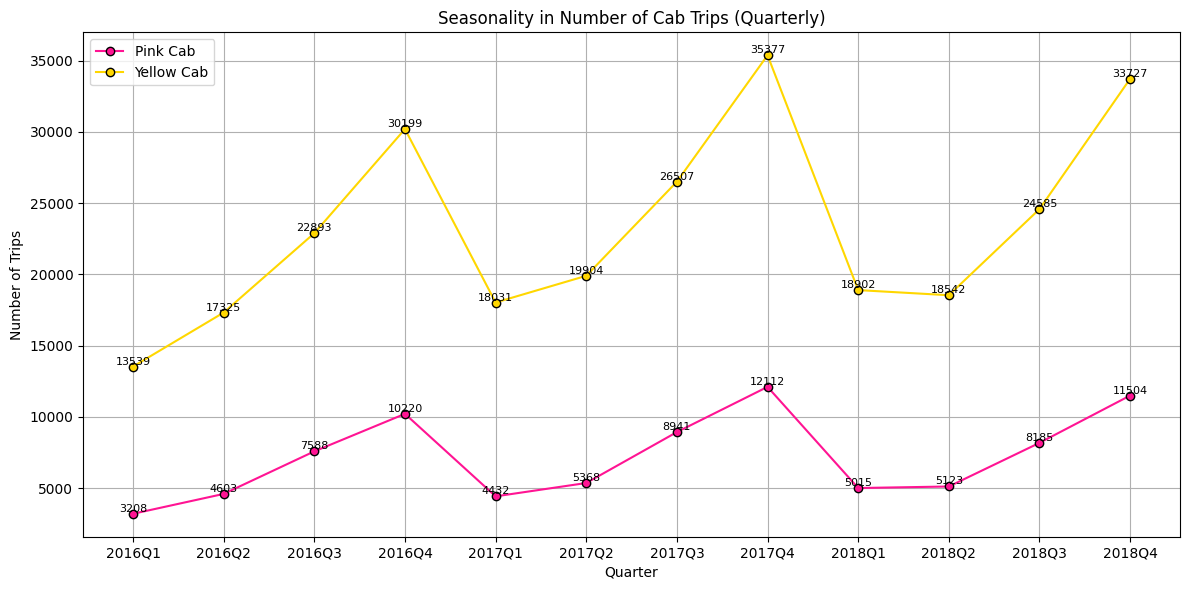

In [509]:
dataset=data.copy()
# Extract year and quarter from 'Travel_Date'
dataset['Travel_Date'] = pd.to_datetime(dataset['Travel_Date'])
dataset['Year_Quarter'] = dataset['Travel_Date'].dt.to_period('Q')
quarterly_data_company = dataset.groupby(['Year_Quarter', 'Company']).size().unstack(fill_value=0)
quarterly_data_company['Year_Quarter_str'] = quarterly_data_company.index.astype(str)

plt.figure(figsize=(12, 6))
plt.plot(quarterly_data_company['Year_Quarter_str'], quarterly_data_company['Pink Cab'], marker='o', markeredgecolor='black', label='Pink Cab', color='deeppink')
plt.plot(quarterly_data_company['Year_Quarter_str'], quarterly_data_company['Yellow Cab'], marker='o', markeredgecolor='black', label='Yellow Cab', color='gold')
# Annotating count values
for i, row in quarterly_data_company.iterrows():
    plt.text(row['Year_Quarter_str'], row['Pink Cab'], str(row['Pink Cab']), ha='center', va='bottom', fontsize=8)
    plt.text(row['Year_Quarter_str'], row['Yellow Cab'], str(row['Yellow Cab']), ha='center', va='bottom', fontsize=8)

plt.xlabel('Quarter')
plt.ylabel('Number of Trips')
plt.title('Seasonality in Number of Cab Trips (Quarterly)')
plt.xticks(rotation=0)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


* **Profit:Quarterly Trends:**

  **``2016:``** Both Pink Cab and Yellow Cab experienced an upward trajectory in profits throughout the year. Yellow Cab consistently outperformed Pink Cab in terms of profit generation in each quarter.

  **``2017:``** The profit trends continued to rise for both companies in 2017. However, Pink Cab's profitability remained below that of Yellow Cab across all quarters, indicating Yellow Cab's superior revenue-generating capabilities.

  **``2018:``** Profit dynamics varied across quarters in 2018. Pink Cab saw fluctuations in profitability, while Yellow Cab maintained relatively stable profits, albeit with some fluctuations. Yellow Cab continued to outperform Pink Cab in terms of profit generation in each quarter.

  The analysis of quarterly profit data highlights the financial performance of Pink Cab and Yellow Cab services from 2016 to 2018. While **Yellow Cab** maintains its position as the **market leader** with **higher profitability**, Pink Cab faces challenges in achieving comparable levels of financial success.

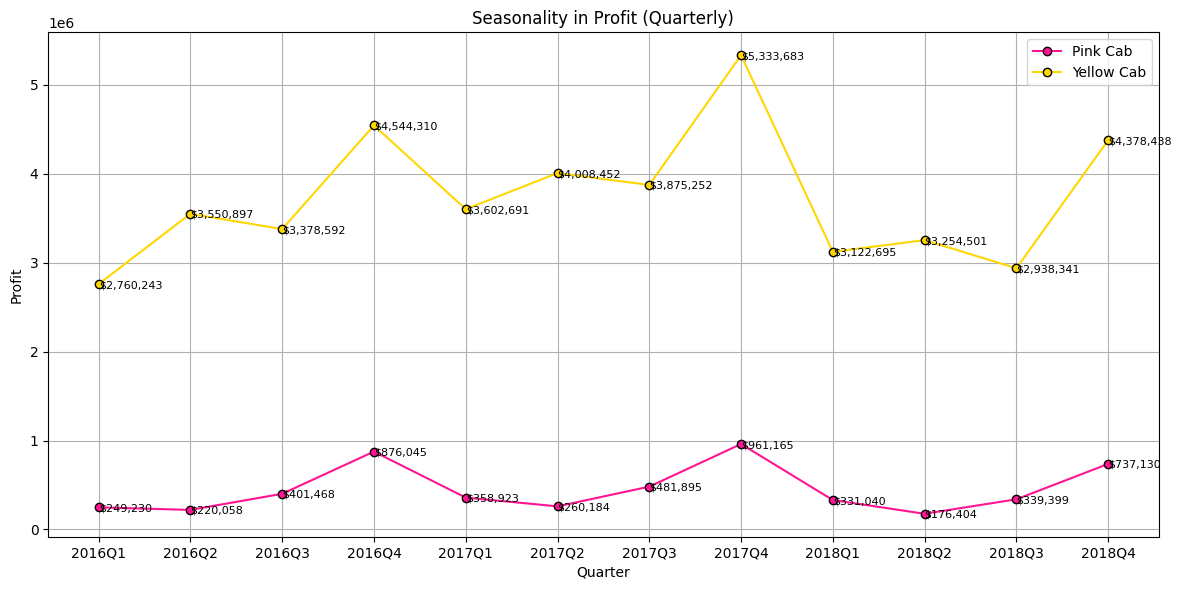

In [528]:
profit_data_company = dataset.groupby(['Year_Quarter', 'Company'])['Profit'].sum().unstack(fill_value=0)
profit_data_company['Year_Quarter_str'] = profit_data_company.index.astype(str)

plt.figure(figsize=(12, 6))
plt.plot(profit_data_company['Year_Quarter_str'], profit_data_company['Pink Cab'], marker='o', markeredgecolor='black', label='Pink Cab', color='deeppink')
plt.plot(profit_data_company['Year_Quarter_str'], profit_data_company['Yellow Cab'], marker='o', markeredgecolor='black', label='Yellow Cab', color='gold')
# Annotating profit values
for i, row in profit_data_company.iterrows():
    plt.text(row['Year_Quarter_str'], row['Pink Cab'], f"${row['Pink Cab']:,.0f}", ha='left', va='center_baseline', fontsize=8)
    plt.text(row['Year_Quarter_str'], row['Yellow Cab'], f"${row['Yellow Cab']:,.0f}", ha='left', va='center_baseline', fontsize=8)

plt.xlabel('Quarter')
plt.ylabel('Profit')
plt.title('Seasonality in Profit (Quarterly)')

plt.xticks(rotation=0)
plt.legend()
plt.grid(True)
plt.grid(True)
plt.tight_layout()
plt.show()


# **Cab User Analysis**


In [487]:
Cab_Users=data.groupby(['Company','Gender','Age','Payment_Mode','City'])['Price_Charged'].mean().reset_index()
Cab_Users.head(10)

,Company,Gender,Age,Payment_Mode,City,Price_Charged
0,Pink Cab,Female,18,Card,ATLANTA GA,342.778421
1,Pink Cab,Female,18,Card,AUSTIN TX,298.598261
2,Pink Cab,Female,18,Card,BOSTON MA,327.977667
3,Pink Cab,Female,18,Card,CHICAGO IL,252.780000
4,Pink Cab,Female,18,Card,DALLAS TX,328.845000
5,Pink Cab,Female,18,Card,DENVER CO,310.190000
6,Pink Cab,Female,18,Card,LOS ANGELES CA,318.292857
7,Pink Cab,Female,18,Card,MIAMI FL,315.195263
8,Pink Cab,Female,18,Card,NASHVILLE TN,280.865294
9,Pink Cab,Female,18,Card,NEW YORK NY,343.939500


* **Number of Male and Female Users in Each Company:**

  The bar plot shows the count of male and female users for each cab company (Pink Cab and Yellow Cab).

  It appears that there are **more male users** than female users for both cab companies.

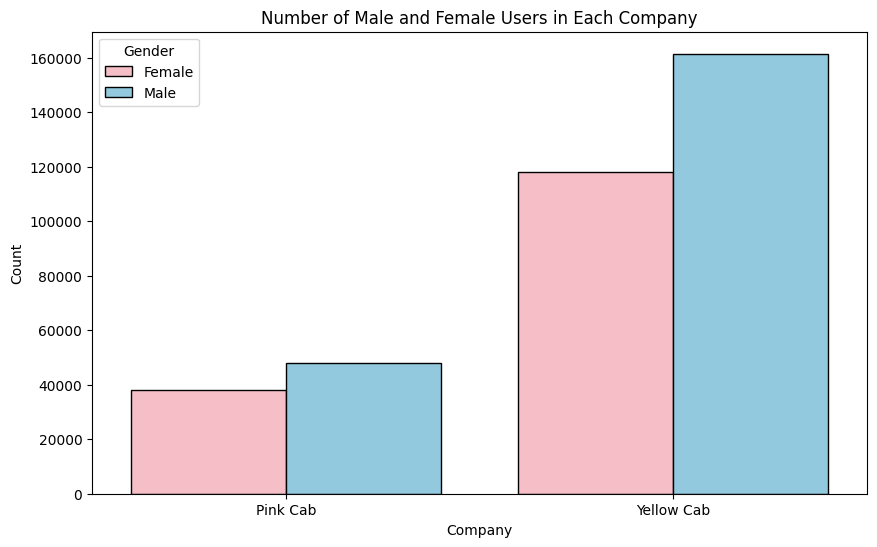

In [488]:
gender_counts = data.groupby(['Company', 'Gender']).size().reset_index(name='Count')
colors_gender=['lightpink','skyblue']
plt.figure(figsize=(10, 6))
sns.barplot(x='Company', y='Count', hue='Gender', data=gender_counts, palette=colors_gender,edgecolor='black')
plt.title('Number of Male and Female Users in Each Company')
plt.xlabel('Company')
plt.ylabel('Count')
plt.show()

* **Distribution of Female and Male Users Across Cities for Pink Cab and Yellow Cab:**

  The first subplot displays the distribution of female and male users for Pink Cab across different cities.

  The second subplot illustrates the distribution of female and male users for Yellow Cab across different cities.

  The gender distribution varies across cities, with some cities having more female users while others have more male users.

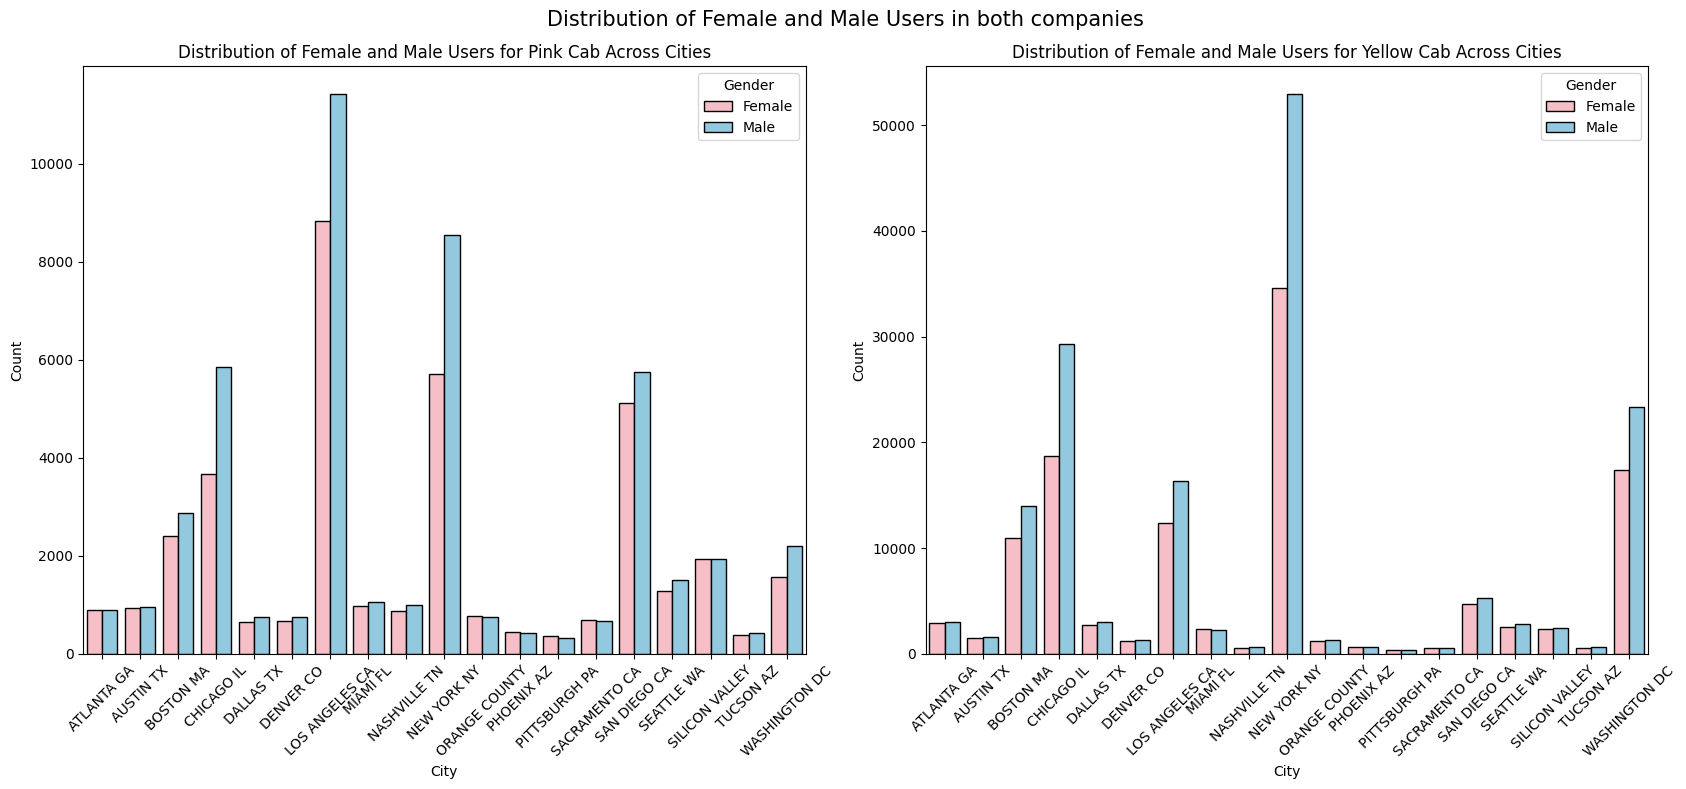

In [489]:
fig, axes = plt.subplots(1, 2, figsize=(17, 8))
colors_gender = ['lightpink', 'skyblue']
fig.suptitle('Distribution of Female and Male Users in both companies', fontsize=15)

# Pink Cab
pink_cab_gender_city_counts = PinkCab_df.groupby(['City', 'Gender']).size().reset_index(name='Count')
sns.barplot(x='City', y='Count', hue='Gender', data=pink_cab_gender_city_counts, palette=colors_gender, ax=axes[0],edgecolor='black')
axes[0].set_title('Distribution of Female and Male Users for Pink Cab Across Cities')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].legend(title='Gender')

# Yellow Cab
yellow_cab_gender_city_counts = YellowCab_df.groupby(['City', 'Gender']).size().reset_index(name='Count')
sns.barplot(x='City', y='Count', hue='Gender', data=yellow_cab_gender_city_counts, palette=colors_gender, ax=axes[1],edgecolor='black')
axes[1].set_title('Distribution of Female and Male Users for Yellow Cab Across Cities')
axes[1].set_xlabel('City')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].legend(title='Gender')

plt.tight_layout()
plt.show()

* **Price Charged for Female and Male Users in both companies:**

  The first subplot shows the average price charged to female and male users for **Pink Cab** across different cities.

  The second subplot shows the average price charged to female and male users for **Yellow Cab** across different cities.

  The bars represent the average price charged to users of each gender in each city.

  Interestingly, there are **variations** in the average price charged to female and male users across different cities for both cab companies.

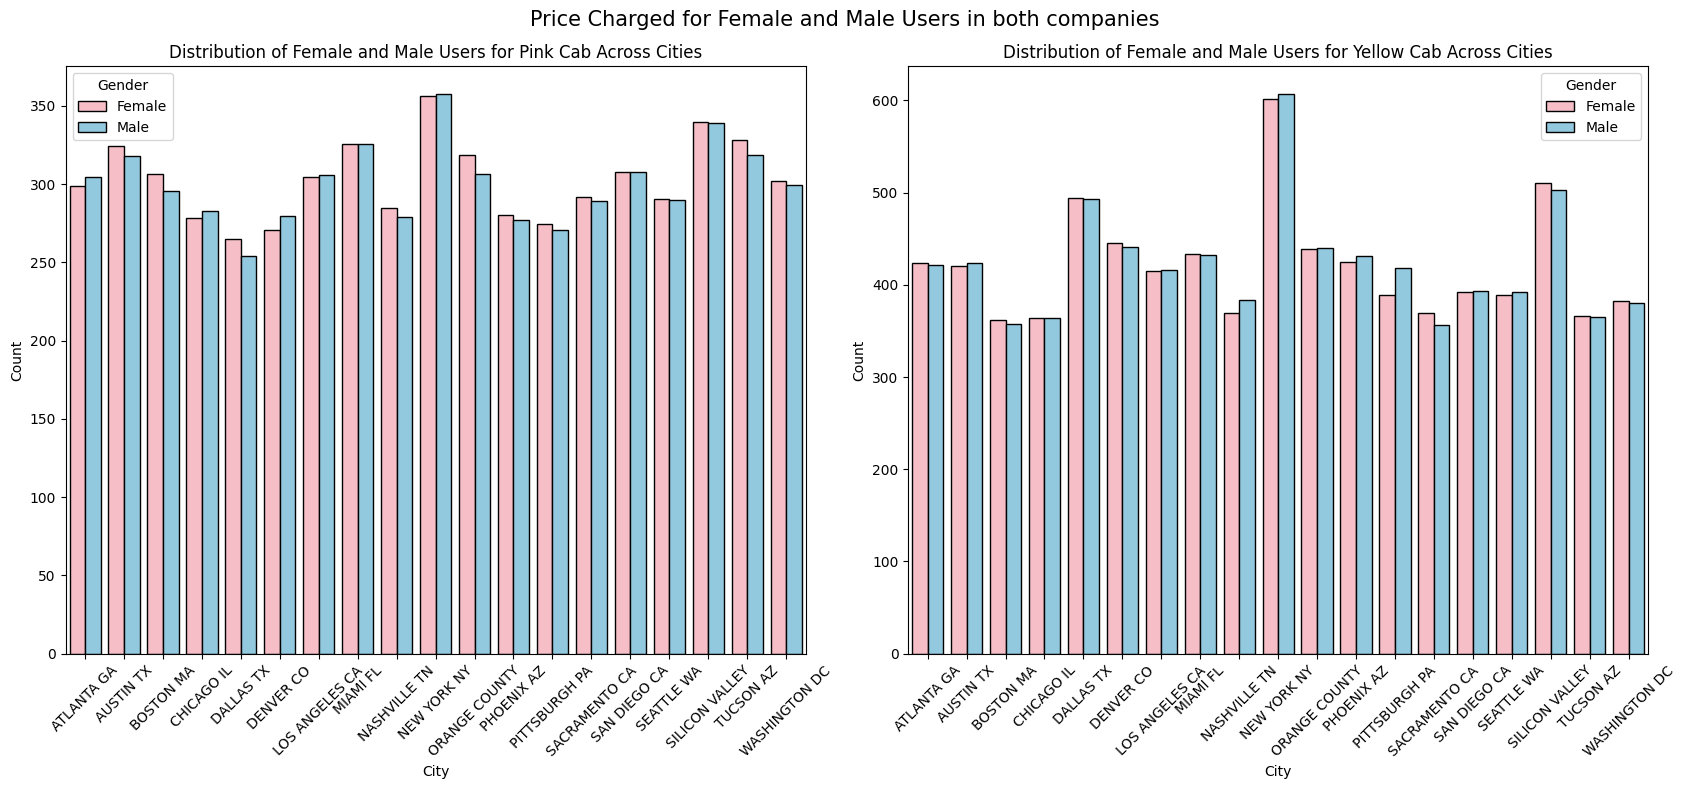

In [490]:
fig, axes = plt.subplots(1, 2, figsize=(17, 8))
colors_gender = ['lightpink', 'skyblue']
fig.suptitle('Price Charged for Female and Male Users in both companies', fontsize=15)

# Pink Cab
pink_cab_gender_city_counts = PinkCab_df.groupby(['City', 'Gender'])['Price_Charged'].mean().reset_index()
sns.barplot(x='City', y='Price_Charged', hue='Gender', data=pink_cab_gender_city_counts, palette=colors_gender, ax=axes[0],edgecolor='black')
axes[0].set_title('Distribution of Female and Male Users for Pink Cab Across Cities')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].legend(title='Gender')

# Yellow Cab
yellow_cab_gender_city_counts = YellowCab_df.groupby(['City', 'Gender'])['Price_Charged'].mean().reset_index()
sns.barplot(x='City', y='Price_Charged', hue='Gender', data=yellow_cab_gender_city_counts, palette=colors_gender, ax=axes[1],edgecolor='black')
axes[1].set_title('Distribution of Female and Male Users for Yellow Cab Across Cities')
axes[1].set_xlabel('City')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].legend(title='Gender')

plt.tight_layout()
plt.show()

* **Total Customers by Age Range**

  The chart shows that the largest customer segment falls in the 20-29 age range (32.2%), followed by the 30-39 age range (31.6%). The proportion of customers reduces as age range increases.

In [491]:
dataset=data.copy()
bins = [18, 19, 29, 39, 49, 59, 69]
labels = ['18-19', '20-29', '30-39', '40-49', '50-59', '60+']
dataset['Age_range'] = pd.cut(dataset.Age, bins, labels = labels,include_lowest = True)
age_range_share = dataset.groupby('Age_range').Customer_ID.nunique()

Text(0.5, 1.0, 'Total Customers by Age Range')

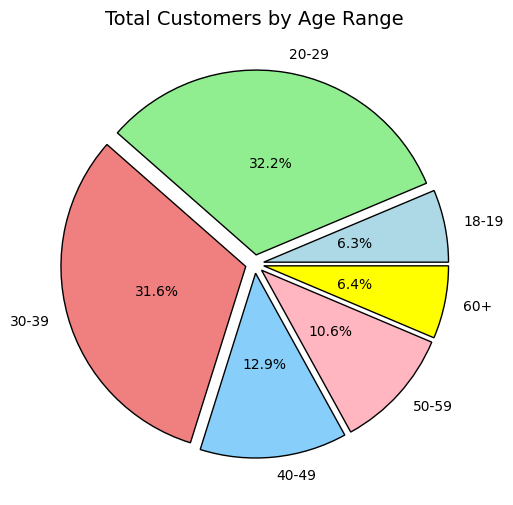

In [492]:
pie, ax = plt.subplots(figsize=[10,6])
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink', 'yellow']
labels = age_range_share.keys()
plt.pie(x=age_range_share, autopct="%.1f%%", explode=[0.05]*6, labels=labels, pctdistance=0.5,colors=colors,wedgeprops={'edgecolor': 'black'})
plt.title("Total Customers by Age Range", fontsize=14)

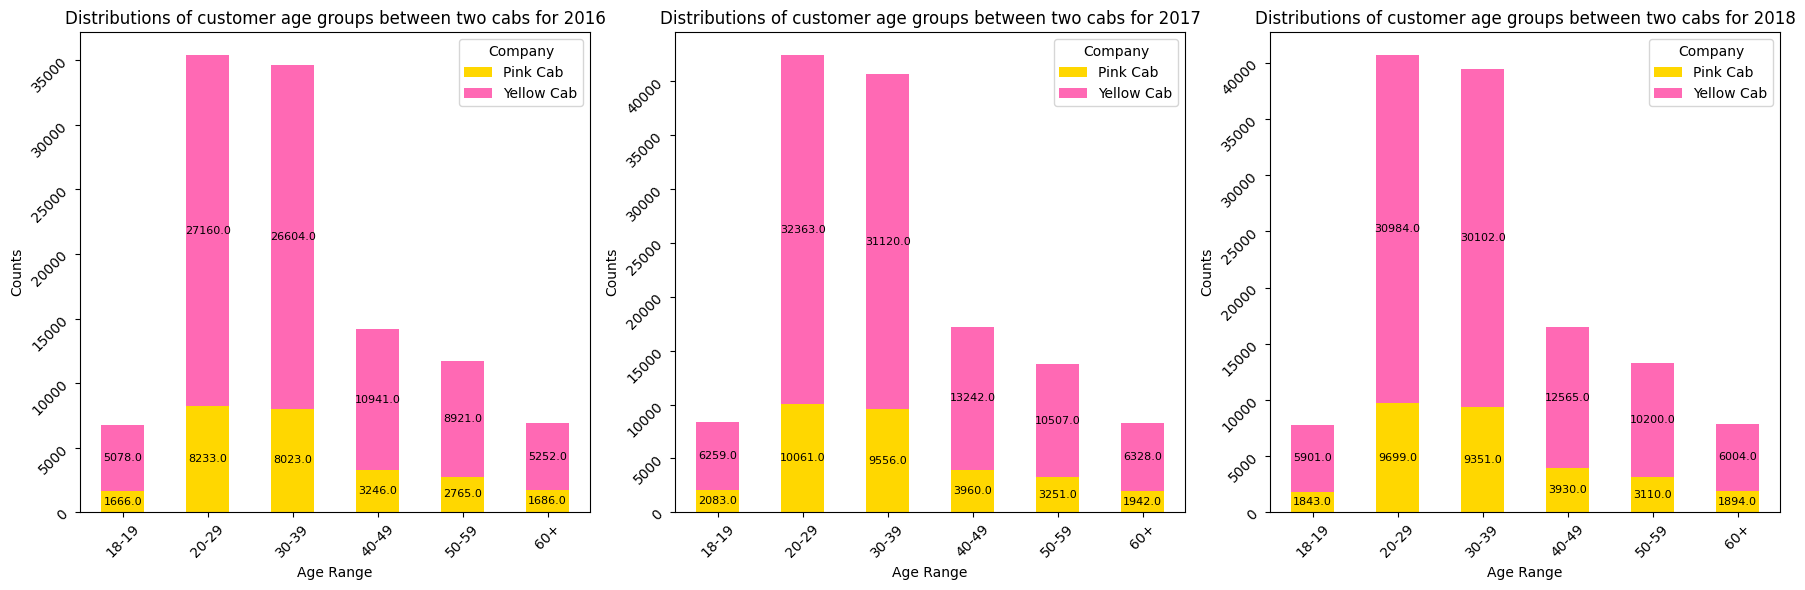

In [493]:
dataset_2016 = dataset[dataset['Year'] == 2016]
dataset_2017 = dataset[dataset['Year'] == 2017]
dataset_2018 = dataset[dataset['Year'] == 2018]
company_colors=['gold','hotpink']
grouped_data_2016 = dataset_2016.groupby(['Age_range', 'Company']).size().unstack(fill_value=0)
grouped_data_2017 = dataset_2017.groupby(['Age_range', 'Company']).size().unstack(fill_value=0)
grouped_data_2018 = dataset_2018.groupby(['Age_range', 'Company']).size().unstack(fill_value=0)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, df_data, year in zip(axes, [grouped_data_2016, grouped_data_2017, grouped_data_2018], [2016, 2017, 2018]):
    df_data.plot(kind='bar', stacked=True, ax=ax, color=company_colors)
    ax.set_xlabel('Age Range')
    ax.set_ylabel('Counts')
    ax.set_title(f'Distributions of customer age groups between two cabs for {year}')
    ax.legend(title='Company')
    ax.tick_params(labelrotation=45)
    # Annotate each stack with its count
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='black')

plt.tight_layout()
plt.show()


# **Hypothesis Testing**

**Hypothesis 1: Company with Maximum Cab Users**




In [496]:
pink_cab_data_Price = data[data['Company'] == 'Pink Cab']['Price_Charged']
yellow_cab_data_Price = data[data['Company'] == 'Yellow Cab']['Price_Charged']

#  t-test
t_statistic, p_value = ttest_ind(pink_cab_data_Price, yellow_cab_data_Price)

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the average price charged between Pink Cab and Yellow Cab.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average price charged between Pink Cab and Yellow Cab.")


Reject the null hypothesis: There is a significant difference in the average price charged between Pink Cab and Yellow Cab.


**Hypothesis 2: Effect of Holidays on Cab Usage**

In [497]:
holiday_data = data[data['Holiday'] == 'Holiday']['Users']
non_holiday_data = data[data['Holiday'] == 'Non-Holiday']['Users']

# t-test
t_statistic, p_value = ttest_ind(holiday_data, non_holiday_data)
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in cab usage between holidays and non-holidays.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in cab usage between holidays and non-holidays.")


Fail to reject the null hypothesis: There is no significant difference in cab usage between holidays and non-holidays.


**Hypothesis 3: Seasonality in Cab Usage**

In [498]:
# We are going to assume seasons as Spring in Months (3,4,5), Summer (6,7,8), Autumn (9,10,11),  Winter (12,1,2)
spring_data = data[data['Month'].isin([3, 4, 5])]['Users']
summer_data = data[data['Month'].isin([6, 7, 8])]['Users']
fall_data = data[data['Month'].isin([9, 10, 11])]['Users']
winter_data = data[data['Month'].isin([12, 1, 2])]['Users']

#  ANOVA test
f_statistic, p_value = f_oneway(spring_data, summer_data, fall_data, winter_data)
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in cab usage across different seasons.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in cab usage across different seasons.")


Reject the null hypothesis: There is a significant difference in cab usage across different seasons.


**Hypothesis 4: Impact of Payment Mode on Cab Usage**

In [499]:
contingency_table = pd.crosstab(data['Payment_Mode'], data['Users'])

# chi-square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table)
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant association between payment mode and cab usage.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between payment mode and cab usage.")


Fail to reject the null hypothesis: There is no significant association between payment mode and cab usage.


**Hypothesis 5: Impact of City Population on Cab Usage**

In [500]:
# Fit linear regression model
X = sm.add_constant(data['Population'])
y = data['Users']
model = sm.OLS(y, X).fit()

if model.pvalues['Population'] < 0.05:
    print("Reject the null hypothesis: There is a significant impact of city population on cab usage.")
else:
    print("Fail to reject the null hypothesis: There is no significant impact of city population on cab usage.")

Reject the null hypothesis: There is a significant impact of city population on cab usage.


**Hypothesis 6: Impact of Distance Travelled on Profit**

In [501]:
#Correlation
correlation, p_value = pearsonr(data['KM_Travelled'], data['Profit'])

print("Correlation coefficient:", correlation)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: there is a significant impact of KM_Travelled and Profit are related.")
else:
    print("Fail to reject the null hypothesis: there is no significant impact ofKM_Travelled and Profit are related.")

Correlation coefficient: 0.4628802098562883
P-value: 0.0
Reject the null hypothesis: there is a significant impact of KM_Travelled and Profit are related.


**Hypothesis 7: Profit is proportional to increase in customers**

In [502]:
from scipy.stats import linregress

# linear regression to get slope value
slope, intercept, r_value, p_value, std_err = linregress(range(total_customers), customer_profit_mean.values)

print("Slope:", slope)
print("Intercept:", intercept)
print("R-value (correlation coefficient):", r_value)
print("P-value:", p_value)
print("Standard error:", std_err)


if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant relationship between the number of customers and profit margins.")
    if slope > 0:
        print("The relationship is proportional: as the number of customers increases, profit margins also increase.")
    else:
        print("The relationship is inverse proportional: as the number of customers increases, profit margins decrease.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between the number of customers and profit margins.")


Slope: -0.0004528057609286455
Intercept: 35.80990345103224
R-value (correlation coefficient): -0.39458225927960383
P-value: 0.0
Standard error: 5.2792257834810396e-06
Reject the null hypothesis. There is a significant relationship between the number of customers and profit margins.
The relationship is inverse proportional: as the number of customers increases, profit margins decrease.


**Conclusion**

Based on the analysis of cab service data, Yellow Cab emerges as the most promising investment opportunity for XYZ. The company demonstrates strong revenue performance, market presence, and profitability potential compared to Pink Cab. Yellow Cab's effective revenue optimization strategies, diverse customer base, and competitive pricing make it a favorable investment choice. By investing in Yellow Cab, XYZ can capitalize on the company's growth and maximize returns on their investment.